# Merge of recipe & stat dataframes

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler

In [127]:
# Import the data and print the first three rows 
recipe = pd.read_csv("/Users/macbook/Documents/data_science_master/kit_big_data/projet/data/recipe_cleaned.csv")
recipe.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),year,month,day,day_of_week
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,13.0,0.0,2.0,0.0,4.0,2005,9,16,Friday
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,18.0,0.0,17.0,22.0,35.0,1.0,2002,6,17,Monday
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,22.0,32.0,48.0,39.0,27.0,5.0,2005,2,25,Friday


In [128]:
# Import the data and print the first three rows 
stat_user = pd.read_csv("/Users/macbook/Documents/data_science_master/kit_big_data/projet/data/recette_statistiques.csv")
stat_user.head(3)

,recipe_id,nb_user,note_moyenne,note_mediane,note_q1,note_q2,note_q3,note_q4,note_max,note_min,nb_note_lt_5,nb_note_eq_5
0,38,4,4.250000,4.0,4.0,4.0,4.25,5.0,5,4,3,1
1,39,1,3.000000,3.0,3.0,3.0,3.00,3.0,3,3,1,0
2,40,9,4.333333,5.0,4.0,5.0,5.00,5.0,5,1,3,6


In [129]:
merged_df = pd.merge(recipe, stat_user, left_on="id", right_on="recipe_id", how="left")
merged_df.head()


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,note_moyenne,note_mediane,note_q1,note_q2,note_q3,note_q4,note_max,note_min,nb_note_lt_5,nb_note_eq_5
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,5.0,5.0,5.00,5.0,5.00,5.0,5,5,0,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,3.5,4.5,3.00,4.5,5.00,5.0,5,0,2,2
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,4.0,4.0,4.00,4.0,4.00,4.0,4,4,1,0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,4.5,4.5,4.25,4.5,4.75,5.0,5,4,1,1
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,...,5.0,5.0,5.00,5.0,5.00,5.0,5,5,0,1


Vérifions si le merge a créé des NaN :

In [130]:
print('Le nombre de missing values par colonnes :')
print(merged_df.isna().sum())

Le nombre de missing values par colonnes :
name                 0
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description          0
ingredients          0
n_ingredients        0
calories             0
total fat (%)        0
sugar (%)            0
sodium (%)           0
protein (%)          0
saturated fat (%)    0
carbohydrates (%)    0
year                 0
month                0
day                  0
day_of_week          0
recipe_id            0
nb_user              0
note_moyenne         0
note_mediane         0
note_q1              0
note_q2              0
note_q3              0
note_q4              0
note_max             0
note_min             0
nb_note_lt_5         0
nb_note_eq_5         0
dtype: int64


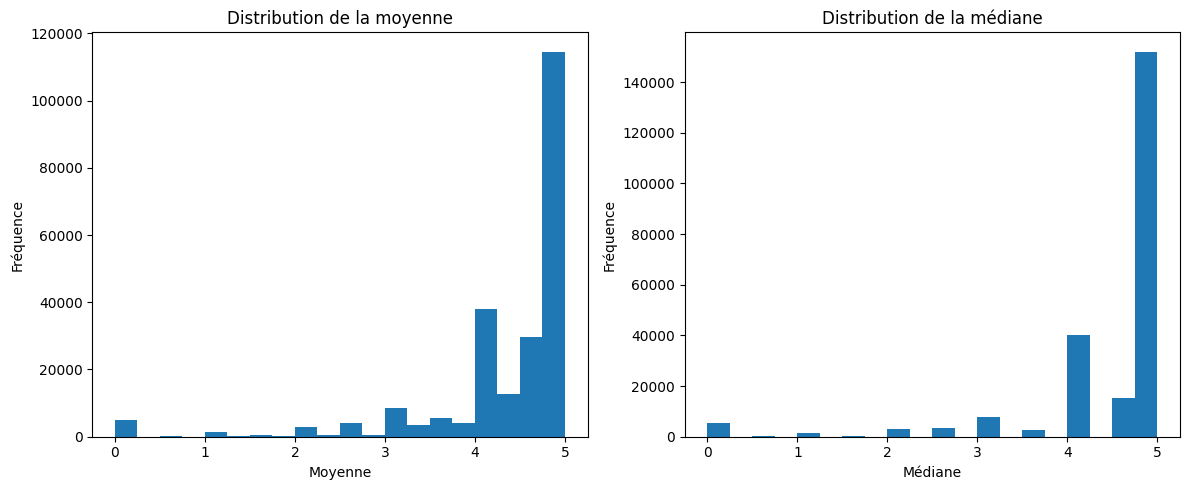

In [131]:
# Plot histograms for mean and median
plt.figure(figsize=(12, 5))

# Mean distribution
plt.subplot(1, 2, 1)
plt.hist(merged_df['note_moyenne'], bins=20)
plt.title('Distribution de la moyenne')
plt.xlabel('Moyenne')
plt.ylabel('Fréquence')

# Median distribution
plt.subplot(1, 2, 2)
plt.hist(merged_df['note_mediane'], bins=20)
plt.title('Distribution de la médiane')
plt.xlabel('Médiane')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/2011645816.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([merged_df['note_moyenne'], merged_df['note_mediane']], labels=['Moyenne', 'Mediane'])


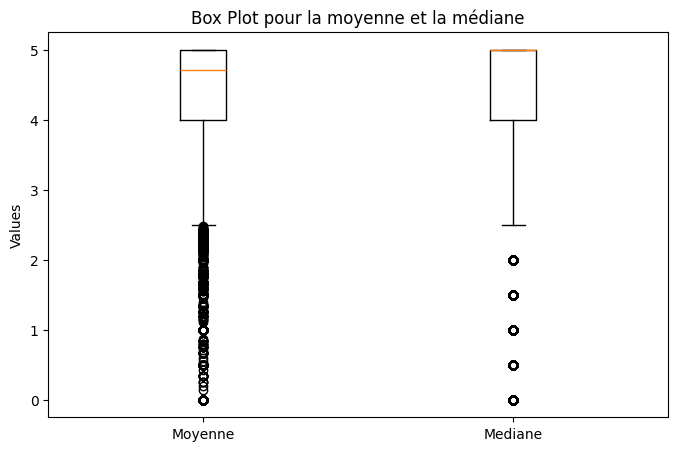

In [132]:
# Boxplot
plt.figure(figsize=(8, 5))
plt.boxplot([merged_df['note_moyenne'], merged_df['note_mediane']], labels=['Moyenne', 'Mediane'])
plt.title('Box Plot pour la moyenne et la médiane')
plt.ylabel('Values')
plt.show()

Regardons à quelle note correspond le 1e quartile. Nous nous concentrerons sur les 25% moins bonnes recettes pour notre analyse.

In [133]:
# Calculate the first quartile for mean and median
mean_third_quartile = merged_df['note_moyenne'].quantile(0.25)
median_third_quartile = merged_df['note_mediane'].quantile(0.25)

# Display the results
print("Third Quartile for Mean:", mean_third_quartile)
print("Third Quartile for Median:", median_third_quartile)

Third Quartile for Mean: 4.0
Third Quartile for Median: 4.0


In [134]:
# Filter the recipes with a rating of 4.0
bad_ratings = merged_df[merged_df['note_moyenne'] < 4.0]

# Display the number of recipes with this rating
print("Number of recipes with a mean of less than 4.0:", bad_ratings.shape[0])

Number of recipes with a mean of less than 4.0: 36929


# Qu'est-ce qui caractérise une mauvaise recette ?

La première partie de l'analyse portera sur l'analyse des contributions qui ont eu une moyenne de moins de 4/5 :
Quels sont les critères d'une mauvaise recette/contribution ? Quelles sont les caractéristiques des recettes les moins populaires ? Qu'est-ce qui fait qu'une recette est très bien notée / mal notée? 

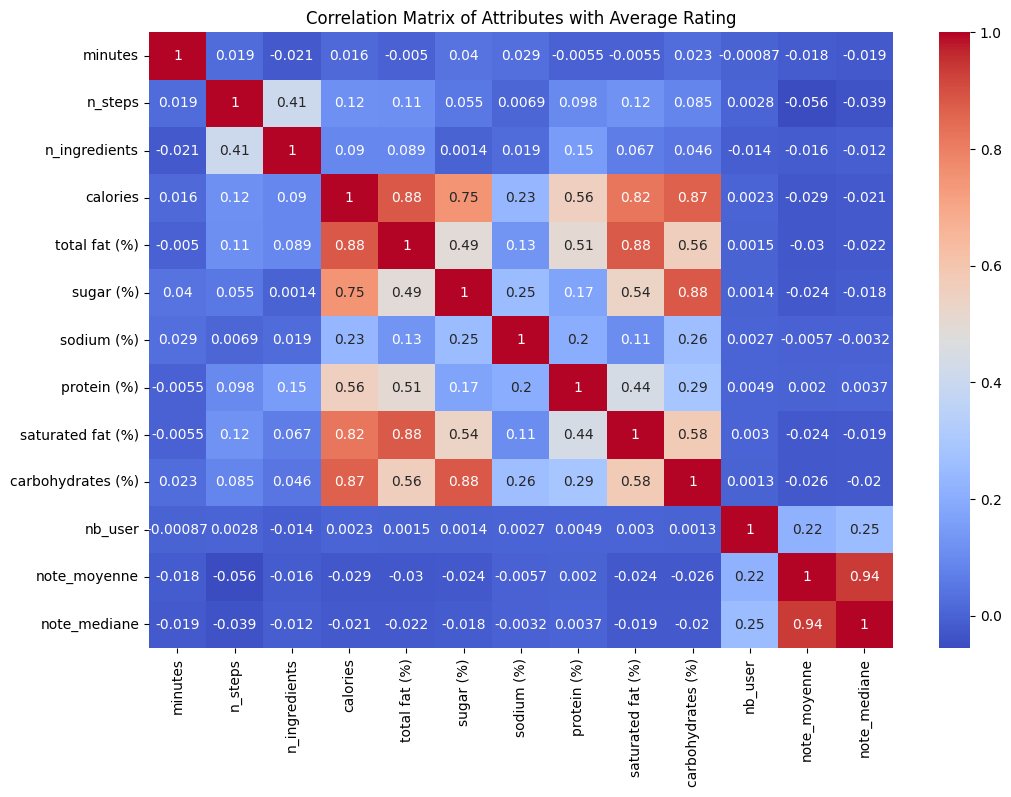

In [135]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation = bad_ratings[['minutes', 'n_steps', 'n_ingredients', 'calories', 'total fat (%)', 'sugar (%)', 
                           'sodium (%)', 'protein (%)', 'saturated fat (%)', 'carbohydrates (%)', 
                           'nb_user', 'note_moyenne', 'note_mediane']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Attributes with Average Rating')
plt.show()

Pas de corrélation entre les notes et les variables sélectionnées dans la correlation matrix. Regardons les distributions.

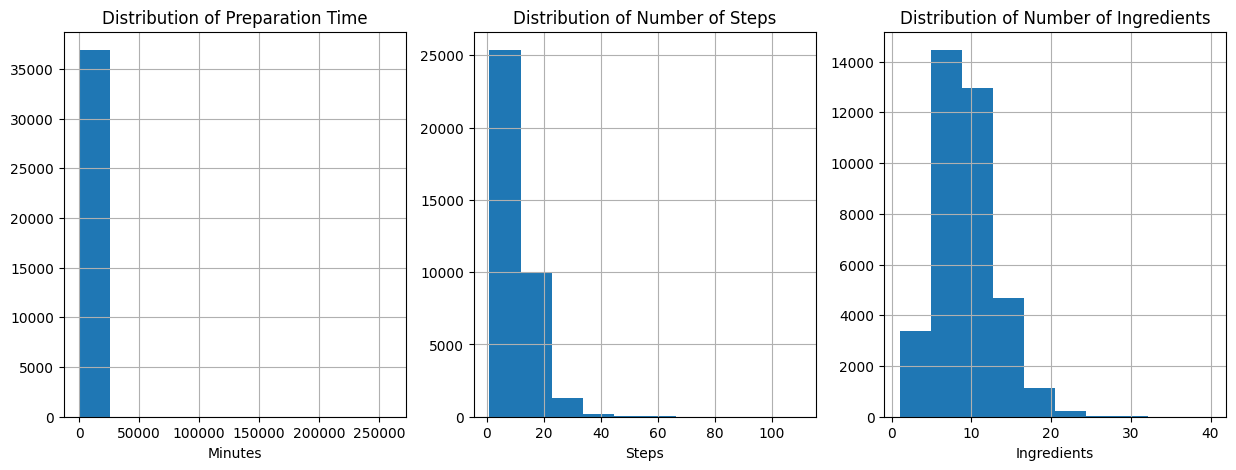

In [136]:
# Distribution of preparation time, number of steps, and ingredients for low-rated recipes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

bad_ratings['minutes'].hist(ax=axes[0])
axes[0].set_title('Distribution of Preparation Time')
axes[0].set_xlabel('Minutes')

bad_ratings['n_steps'].hist(ax=axes[1])
axes[1].set_title('Distribution of Number of Steps')
axes[1].set_xlabel('Steps')

bad_ratings['n_ingredients'].hist(ax=axes[2])
axes[2].set_title('Distribution of Number of Ingredients')
axes[2].set_xlabel('Ingredients')
plt.show()

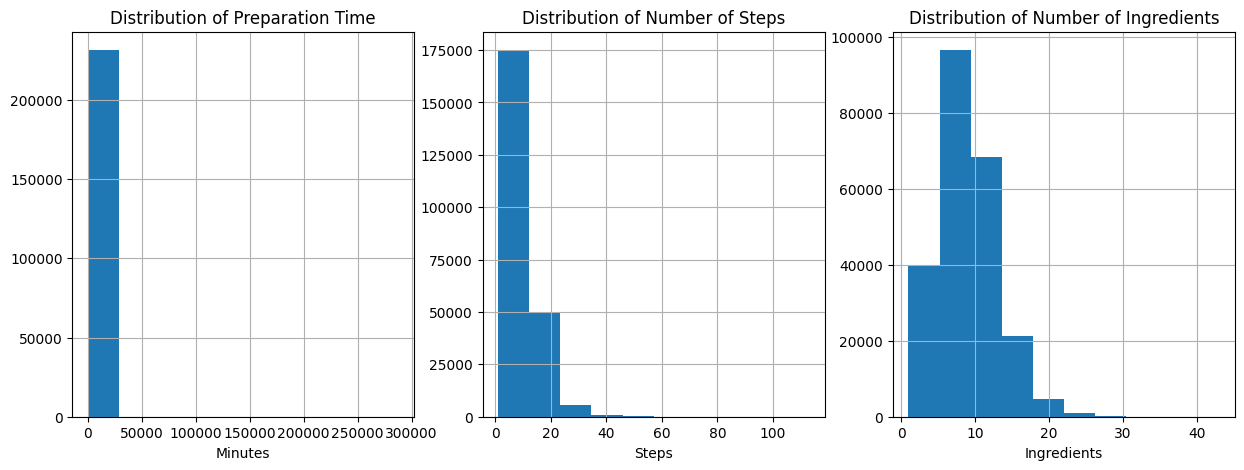

In [137]:
# Comparons avec toutes les recettes de la base de données : est-ce que les mauvaises notes ont tiré vers le bas certaines de ces variables ?

# Distribution of preparation time, number of steps, and ingredients for low-rated recipes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

merged_df['minutes'].hist(ax=axes[0])
axes[0].set_title('Distribution of Preparation Time')
axes[0].set_xlabel('Minutes')

merged_df['n_steps'].hist(ax=axes[1])
axes[1].set_title('Distribution of Number of Steps')
axes[1].set_xlabel('Steps')

merged_df['n_ingredients'].hist(ax=axes[2])
axes[2].set_title('Distribution of Number of Ingredients')
axes[2].set_xlabel('Ingredients')
plt.show()

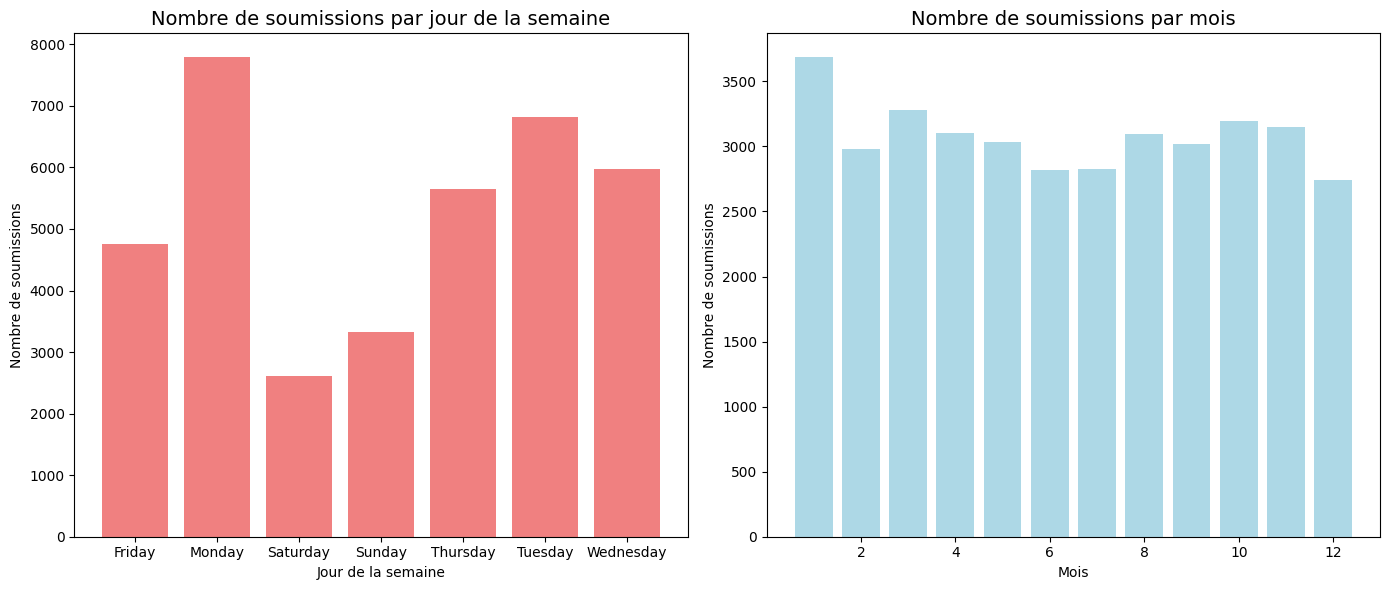

In [138]:
# Grouper par jour de la semaine pour compter les soumissions
day_of_week_group = bad_ratings['day_of_week'].value_counts().sort_index()

# Grouper par mois pour compter les soumissions
month_group = bad_ratings['month'].value_counts().sort_index()

# Créer les barplots
plt.figure(figsize=(14, 6))

# Barplot pour le nombre de soumissions selon le jour de la semaine
plt.subplot(1, 2, 1)
plt.bar(day_of_week_group.index, day_of_week_group.values, color='lightcoral')
plt.title('Nombre de soumissions par jour de la semaine', fontsize=14)
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de soumissions')

# Barplot pour le nombre de soumissions selon le mois de l'année
plt.subplot(1, 2, 2)
plt.bar(month_group.index, month_group.values, color='lightblue')
plt.title('Nombre de soumissions par mois', fontsize=14)
plt.xlabel('Mois')
plt.ylabel('Nombre de soumissions')

# Ajuster l'affichage des graphiques
plt.tight_layout()
plt.show()

Nous n'observons pas de changements dans la distribution côté Preparation Time, Number of steps, Jour et mois de submission. En revanche il y a une légère modification côté Ingrédients. Il va falloir creuser cette variable.

# Analyser l'impact du temps de préparation and la complexité sur les notes

Afin de comparer les recettes mal notées des bien notées, nous devons filtrer le recipe dataframe en ne gardant que les meilleurs recettes. Nous sélectionnerons celles qui ont une moyenne de 5. 

In [139]:
# Filter the recipes with a rating of 5.0 : 
good_ratings = merged_df[merged_df['note_moyenne'] == 5.0]

# Display the number of recipes with this rating
print("Number of recipes with a mean of 5.0:", good_ratings.shape[0])

Number of recipes with a mean of 5.0: 100426


/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/123240966.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_minutes, labels=['High-Rated Recipes', 'Low-Rated Recipes'])


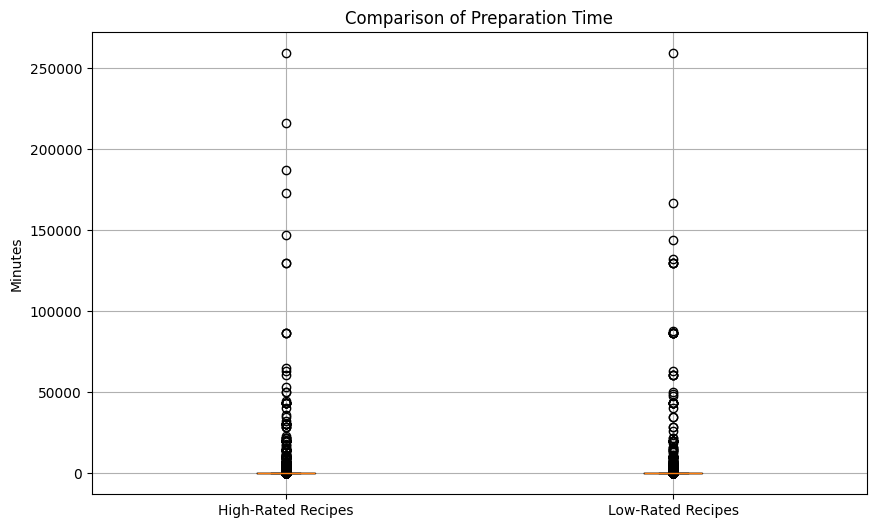

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/123240966.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_steps, labels=['High-Rated Recipes', 'Low-Rated Recipes'])


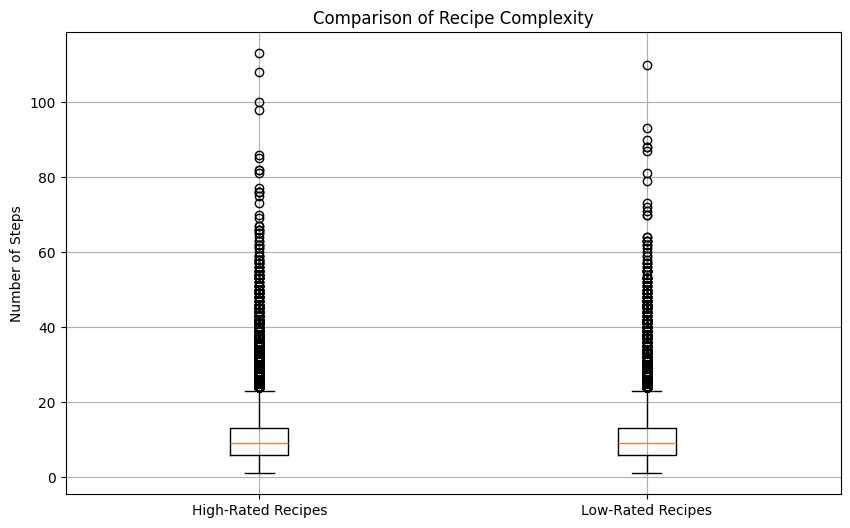

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/123240966.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_steps, labels=['High-Rated Recipes', 'Low-Rated Recipes'])


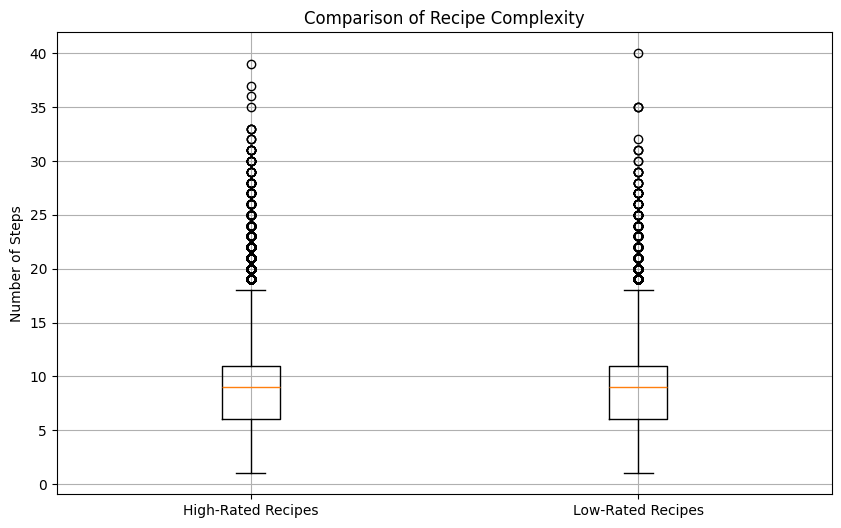

In [140]:
# 1. Box Plot for Minutes
plt.figure(figsize=(10, 6))

# Data to plot
data_minutes = [good_ratings['minutes'], bad_ratings['minutes']]

# Create box plot
plt.boxplot(data_minutes, labels=['High-Rated Recipes', 'Low-Rated Recipes'])
plt.title('Comparison of Preparation Time')
plt.ylabel('Minutes')
plt.grid(True)
plt.show()

# 2. Box Plot for Complexity (Number of Steps)
plt.figure(figsize=(10, 6))

# Data to plot
data_steps = [good_ratings['n_steps'], bad_ratings['n_steps']]

# Create box plot
plt.boxplot(data_steps, labels=['High-Rated Recipes', 'Low-Rated Recipes'])
plt.title('Comparison of Recipe Complexity')
plt.ylabel('Number of Steps')
plt.grid(True)
plt.show()

# 3. Box Plot for Complexity (Number of Ingredients)
plt.figure(figsize=(10, 6))

# Data to plot
data_steps = [good_ratings['n_ingredients'], bad_ratings['n_ingredients']]

# Create box plot
plt.boxplot(data_steps, labels=['High-Rated Recipes', 'Low-Rated Recipes'])
plt.title('Comparison of Recipe Complexity')
plt.ylabel('Number of Steps')
plt.grid(True)
plt.show()

In [141]:
# Essayons en ne sélectionnant que les very bad ratings : moyenne < 2

# Filter the recipes with a rating of less than 2.0 : 
vb_ratings = merged_df[merged_df['note_moyenne'] < 2.0]

# Display the number of recipes with this rating
print("Number of recipes with a mean of less than 2.0:", vb_ratings.shape[0])

Number of recipes with a mean of less than 2.0: 7451


/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/820891545.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_minutes, labels=['High-Rated Recipes', 'Low-Rated Recipes'])


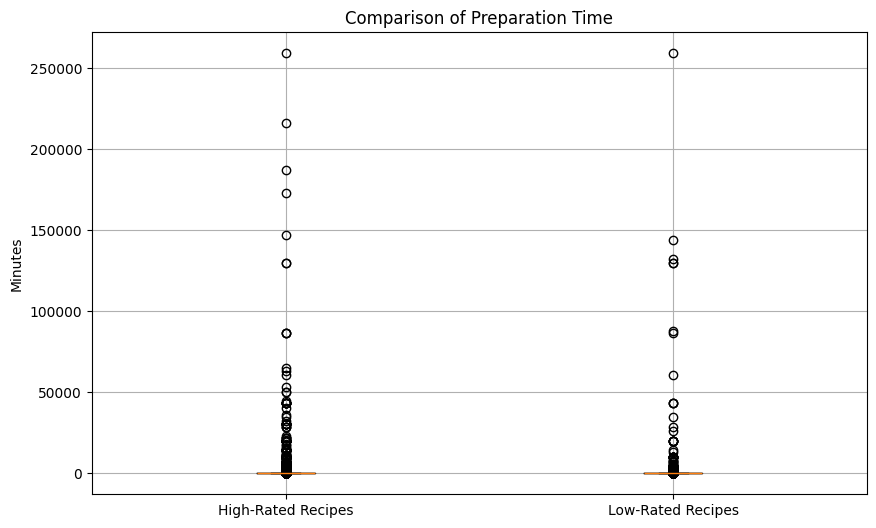

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/820891545.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_steps, labels=['High-Rated Recipes', 'Low-Rated Recipes'])


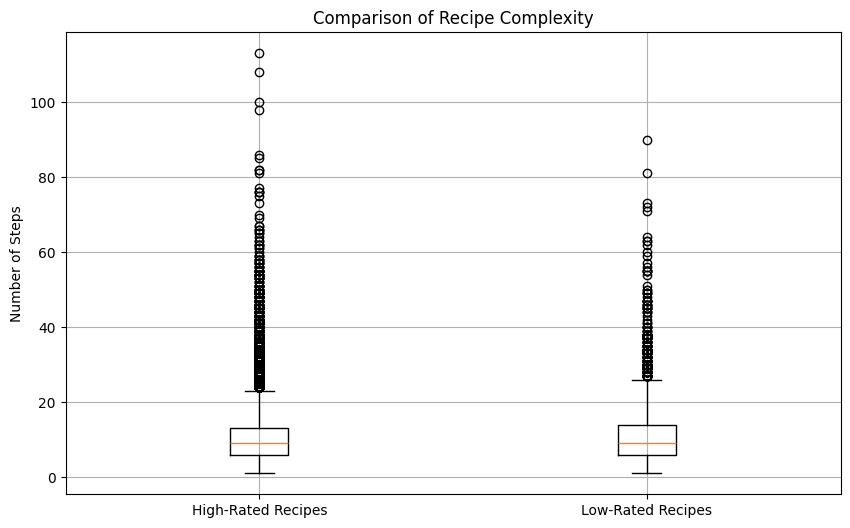

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/820891545.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_steps, labels=['High-Rated Recipes', 'Low-Rated Recipes'])


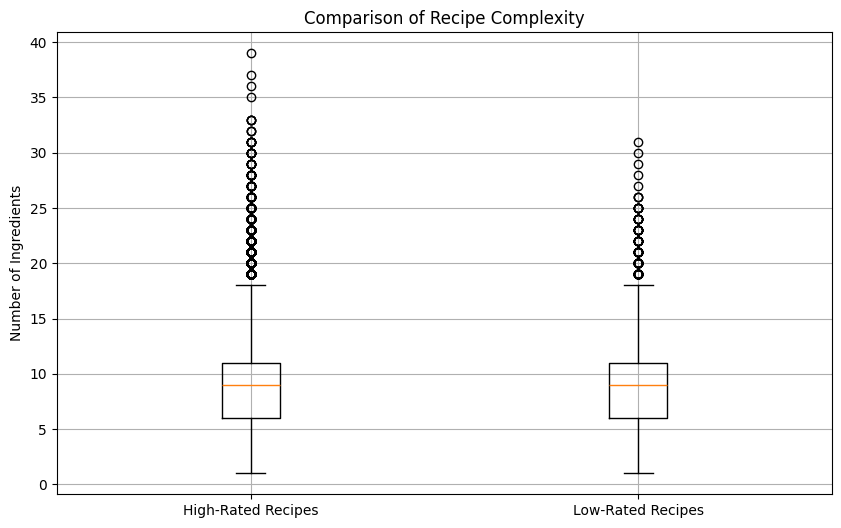

In [142]:
# 1. Box Plot for Minutes
plt.figure(figsize=(10, 6))

# Data to plot
data_minutes = [good_ratings['minutes'], vb_ratings['minutes']]

# Create box plot
plt.boxplot(data_minutes, labels=['High-Rated Recipes', 'Low-Rated Recipes'])
plt.title('Comparison of Preparation Time')
plt.ylabel('Minutes')
plt.grid(True)
plt.show()

# 2. Box Plot for Complexity (Number of Steps)
plt.figure(figsize=(10, 6))

# Data to plot
data_steps = [good_ratings['n_steps'], vb_ratings['n_steps']]

# Create box plot
plt.boxplot(data_steps, labels=['High-Rated Recipes', 'Low-Rated Recipes'])
plt.title('Comparison of Recipe Complexity')
plt.ylabel('Number of Steps')
plt.grid(True)
plt.show()

# 3. Box Plot for Complexity (Number of Ingredients)
plt.figure(figsize=(10, 6))

# Data to plot
data_steps = [good_ratings['n_ingredients'], vb_ratings['n_ingredients']]

# Create box plot
plt.boxplot(data_steps, labels=['High-Rated Recipes', 'Low-Rated Recipes'])
plt.title('Comparison of Recipe Complexity')
plt.ylabel('Number of Ingredients')
plt.grid(True)
plt.show()

Pour pousser cette analyse nous allons créer des catégories (ex minutes : less than 15, 15 to 30 min...) et faire une analyse statistique de ces différentes catégories. Commencons par la variable minutes

<Figure size 1500x900 with 0 Axes>

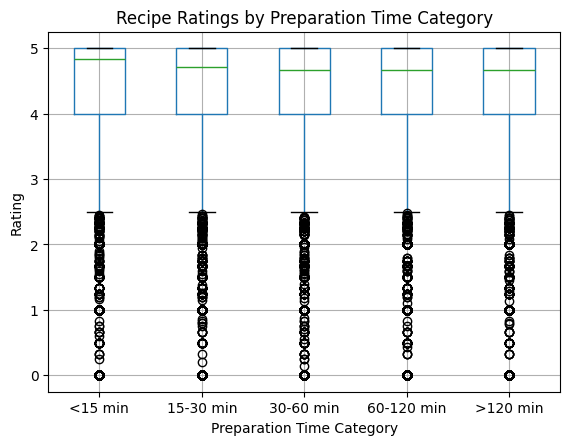

In [143]:
# Create bins for preparation time
bins = [0, 15, 30, 60, 120, merged_df['minutes'].max()]
labels = ['<15 min', '15-30 min', '30-60 min', '60-120 min', '>120 min']
merged_df['prep_time_category'] = pd.cut(merged_df['minutes'], bins=bins, labels=labels, include_lowest=True)

# Box plot of ratings by preparation time category
plt.figure(figsize=(15, 9))
merged_df.boxplot(column='note_moyenne', by='prep_time_category')
plt.title('Recipe Ratings by Preparation Time Category')
plt.xlabel('Preparation Time Category')
plt.ylabel('Rating')
plt.suptitle('')  # Suppress the default title
plt.show()

In [144]:
# Group by preparation time category and calculate average rating
avg_ratings = merged_df.groupby('prep_time_category')['note_moyenne'].mean()
print("Average Ratings by Preparation Time Category:")
print(avg_ratings)


Average Ratings by Preparation Time Category:
prep_time_category
<15 min       4.422544
15-30 min     4.370828
30-60 min     4.324984
60-120 min    4.314191
>120 min      4.267328
Name: note_moyenne, dtype: float64


/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1228187799.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ratings = merged_df.groupby('prep_time_category')['note_moyenne'].mean()


Nous remarquons une différence : plus la durée des recettes augmente, plus la moyenne est tirée vers le bas. Cela nous donne un soupçon sur le fait que la durée de préparation fait baisser les notes.

In [145]:
from scipy.stats import ttest_ind

# Define short and long preparation time groups
short_prep = merged_df[merged_df['prep_time_category'] == '<15 min']['note_moyenne']
long_prep = merged_df[merged_df['prep_time_category'] == '>120 min']['note_moyenne']

# Perform t-test
t_stat, p_value = ttest_ind(short_prep, long_prep, nan_policy='omit', equal_var=False)
print(f"T-test between '<15 min' and '>120 min' preparation times:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.6e}")


T-test between '<15 min' and '>120 min' preparation times:
T-statistic: 19.2875, P-value: 1.405812e-82


En effet la p-value est très petite. Donc il existe une différence statistiquement signifiante entre les ratings des préparations longues vs courtes.

Nous allons prendre le problème à l'envers : filtrer le dataset avec les longues recettes VS courtes et regarder la proportion des moyennes hautes vs basses en créant des catégories de moyennes. Nous comparerons les résultats entre courtes et longues recettes. Nous allons créer une fonction pour pouvoir reproduire cette analyse plus tard

In [146]:
def rating_distribution(df, variable, rating_var, low_threshold, mean_range, high_threshold,
                        bins=[float('-inf'), 2, 3, 4, 5], labels=['Less than 2', '2 to 3', '3 to 4', '4 to 5']):
    
    """
    Calculate the rating distribution for different ranges of a specified variable.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - variable (str): The column name for the variable to filter by (e.g., 'n_steps').
    - rating_var (str): The column name for the rating variable (e.g., 'note_moyenne').
    - low_threshold (float): Threshold below which values are considered "low".
    - mean_range (tuple): Range (min, max) for values considered "mean".
    - high_threshold (float): Threshold above which values are considered "high".
    - bins (list): List of bin edges for rating categorization (default: [float('-inf'), 2, 3, 4, 5]).
    - labels (list): Labels for each bin (default: ['Less than 2', '2 to 3', '3 to 4', '4 to 5']).
    
    Returns:
    - pd.DataFrame: A DataFrame with the percentage distribution of ratings for low, mean, and high categories.
    """
    
    # Helper function to calculate percentage distribution for a specific subset
    def calculate_percentage(subset, total):
        subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
        category_counts = subset['rating_category'].value_counts().sort_index()
        return (category_counts / total) * 100
    
    # High category (greater than or equal to high_threshold)
    high_recipes = df[df[variable] > high_threshold]
    total_high = high_recipes.shape[0]
    category_percentages_high = calculate_percentage(high_recipes, total_high)

    # Mean category (between mean_range[0] and mean_range[1])
    mean_recipes = df[(df[variable] >= mean_range[0]) & (df[variable] <= mean_range[1])]
    total_mean = mean_recipes.shape[0]
    category_percentages_mean = calculate_percentage(mean_recipes, total_mean)

    # Low category (less than low_threshold)
    low_recipes = df[df[variable] < low_threshold]
    total_low = low_recipes.shape[0]
    category_percentages_low = calculate_percentage(low_recipes, total_low)

    # Combine results into a DataFrame
    comparison_df = pd.DataFrame({
        'High Category': category_percentages_high,
        'Mean Category': category_percentages_mean,
        'Low Category': category_percentages_low
    })
    
    # Visualization: Stacked Bar Chart
    # Reformat the DataFrame for the stacked bar chart
    stacked_df = pd.DataFrame({
        'Less than 2': [category_percentages_high.get('Less than 2', 0), category_percentages_mean.get('Less than 2', 0), category_percentages_low.get('Less than 2', 0)],
        '2 to 3': [category_percentages_high.get('2 to 3', 0), category_percentages_mean.get('2 to 3', 0), category_percentages_low.get('2 to 3', 0)],
        '3 to 4': [category_percentages_high.get('3 to 4', 0), category_percentages_mean.get('3 to 4', 0), category_percentages_low.get('3 to 4', 0)],
        '4 to 5': [category_percentages_high.get('4 to 5', 0), category_percentages_mean.get('4 to 5', 0), category_percentages_low.get('4 to 5', 0)]
    }, index=['High Category', 'Mean Category', 'Low Category'])

    # Plot the stacked bar chart
    stacked_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
    plt.title(f'Stacked Rating Distribution by {variable} Category')
    plt.xlabel(f'{variable.capitalize()} Category')
    plt.ylabel('Percentage of Recipes (%)')
    plt.xticks(rotation=0)
    plt.legend(title='Rating Interval', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.show()

    return comparison_df



/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/110

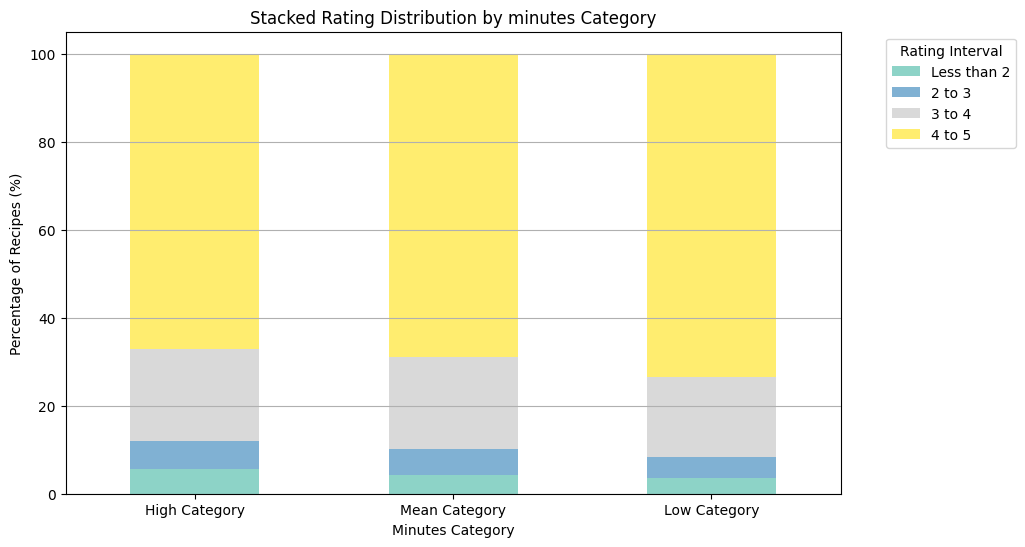


Comparison of Rating Distribution in %:
                 High Category  Mean Category  Low Category
rating_category                                            
Less than 2           5.576856       4.368656      3.470620
2 to 3                6.479222       5.682238      4.896166
3 to 4               20.936447      20.974667     18.061131
4 to 5               67.007475      68.974439     73.572083


In [147]:
comparison_minutes = rating_distribution(
    df=merged_df,
    variable='minutes',
    rating_var='note_moyenne',
    low_threshold=15,
    mean_range=(30, 50),
    high_threshold=120
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_minutes)

Ces éléments nous montrent que la durée de préparation a un impact sur la note. En effet les recettes longues ont un pourcentage de mauvaises notes plus élevées que les recettes courtes. Des temps de préparation plus long sont associés à des ratings plus mauvais.
Mais cela peut aussi juste vouloir dire que les utilisateurs qui notent préfèrent les recettes rapides à préparer, impactant ainsi leur satisfaction et leur notes.

Faisons la même analyse avec la complexité : n_steps et n_ingredients.

Ces variables ont la particularité qu'à la fois des nombre d'étapes/ingrédients élevés et réduits peuvent tirer la moyenne vers le bas. Nous allons comparer pour les deux variables: moins de 3 VS plus de 15 VS entre 6 et 12 (1e et 3e quartile)

On garde les mêmes bins pour les ratings.

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/110

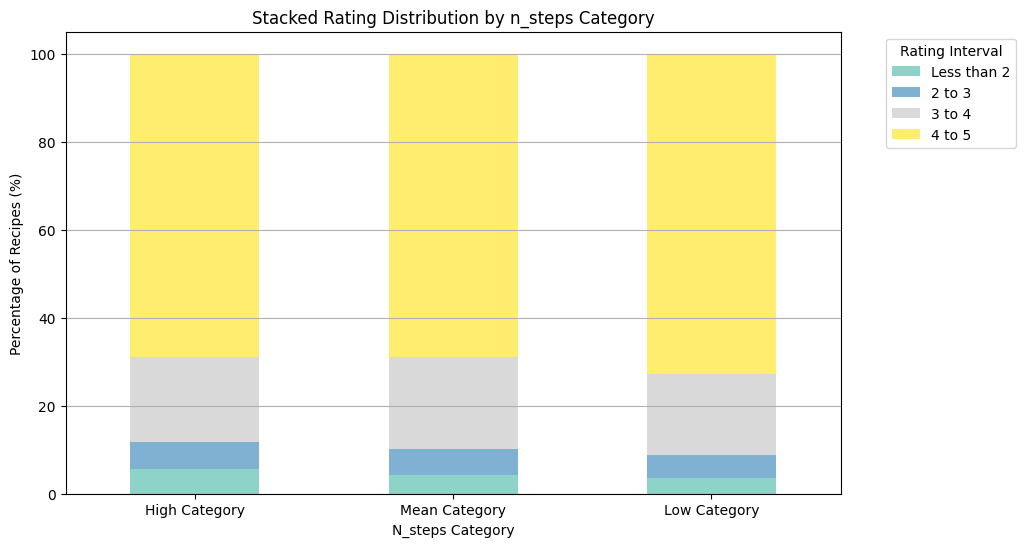


Comparison of Rating Distribution in %:
                 High Category  Mean Category  Low Category
rating_category                                            
Less than 2           5.525002       4.316243      3.671477
2 to 3                6.157612       5.846097      5.061545
3 to 4               19.327972      20.946528     18.378608
4 to 5               68.989414      68.891131     72.888370


In [148]:
comparison_steps = rating_distribution(
    df=merged_df,
    variable='n_steps',
    rating_var='note_moyenne',
    low_threshold=3,
    mean_range=(8, 10),
    high_threshold=15
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_steps)

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/110

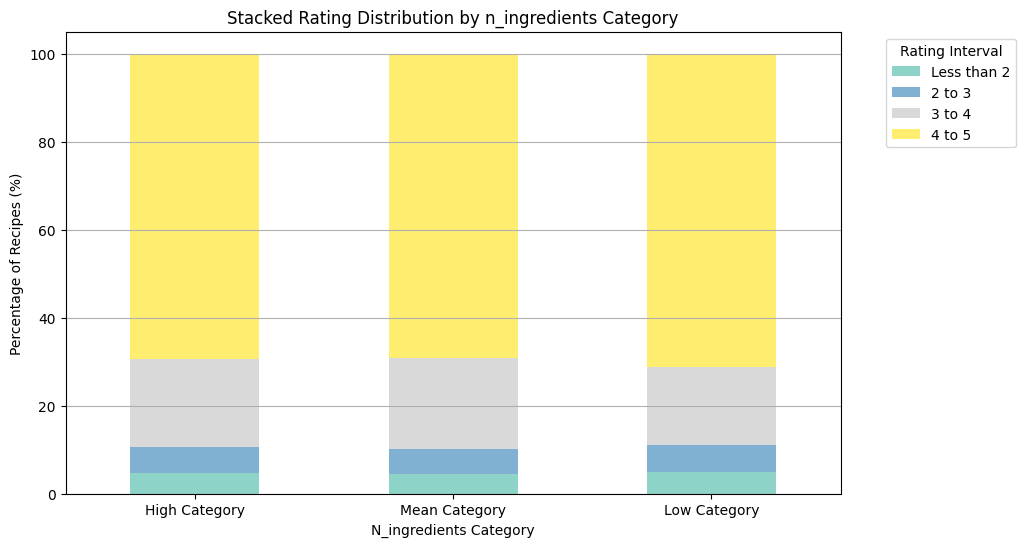


Comparison of Rating Distribution in %:
                 High Category  Mean Category  Low Category
rating_category                                            
Less than 2           4.769828       4.363346      4.881450
2 to 3                5.807781       5.669869      6.229661
3 to 4               20.117265      20.705908     17.619712
4 to 5               69.305126      69.260877     71.269177


In [149]:
comparison_ingr = rating_distribution(
    df=merged_df,
    variable='n_ingredients',
    rating_var='note_moyenne',
    low_threshold=3,
    mean_range=(8, 10),
    high_threshold=15
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_ingr)

Concerning complexity of recipes, it seems users have preferences for mean and low number of steps in recipes. which matches with the output for the preparation time analysis. Nevertheless the number of ingredients doesn't have any impact on their satisfaction. 
To finish with this part of the analysis let's do a regression analysis. 

In [150]:
# Analysons la corrélation entre ces variables 

columns_to_analyze = ['minutes','n_steps','n_ingredients']
# Calculer la matrice de corrélation
correlation_matrix = merged_df[columns_to_analyze].corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

                minutes   n_steps  n_ingredients
minutes        1.000000  0.018197      -0.012104
n_steps        0.018197  1.000000       0.428213
n_ingredients -0.012104  0.428213       1.000000


On va réaliser l'OLS sans la variable ingrédients.

In [151]:
# Regression analysis for 3 variables 

# Prepare data
X = merged_df[['minutes', 'n_steps']]
X = sm.add_constant(X)
y = merged_df['note_moyenne']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           note_moyenne   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     120.4
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           5.50e-53
Time:                        13:54:29   Log-Likelihood:            -3.2640e+05
No. Observations:              231631   AIC:                         6.528e+05
Df Residuals:                  231628   BIC:                         6.528e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3919      0.004   1115.745      0.0

ANALYSE :

R-Squared = O.OO1 -> seulement 0.1% de la variance dans les résultats est expliquée par les variables n_steps et minutes. C'est très bas, ces variables ne semblent pas avoir de pouvoir prédictif sur les ratings, même si on a pu détecter des tendances de comportements users.

Prob (F-Stat) = p-value est statistiquement signifiante (car < 0.05) -> au moins un estimateur a une relation linéaire avec note_moyenne. Cependant l'effet sera minime, comme le montre le résultat R-Squared

Coef minute : VERY small. p-value < 0.05 donc statistiquement signifiant mais son effet est quasi négligeable sur note_moyenne. Même constat pour n_steps même si l'effet est légèrement supérieur : une augmentation de 10 étapes va baisser la moyenne d'environ 0.046...

Condition Number: 3.80e+03 (or 3800) —> Très élevé : multicolinéarité parmis les estimateurs. Devrait être autour de 30. Affecte potentiellement les coefficients des estimateurs.

Les tests Omnibus / Prob(Omnibus) et Jarque-Bera (JB) / Prob(JB) nous permettent de voir que les résidus ne suivent probablement pas une distribution gaussienne, les conditions pour une OLS ne sont donc pas met.

--> il va falloir :
1. Tester avec l'échelle log 
2. Changer de modèle

# Analyser le contenu nutritionnel des recettes et leur impact sur les notes

Investigate if certain nutritional aspects (like high sugar or sodium) correlate with lower ratings. Users may rate recipes poorly if they perceive them as unhealthy or unbalanced.

In [152]:
# On va utiliser notre fonction rating_distribution. Pour connaitre les seuils, regardons le describe :

In [153]:
merged_df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total fat (%),sugar (%),sodium (%),protein (%),...,note_moyenne,note_mediane,note_q1,note_q2,note_q3,note_q4,note_max,note_min,nb_note_lt_5,nb_note_eq_5
count,231631.000000,231631.000000,2.316310e+05,231631.000000,231631.000000,231631.000000,231631.000000,231631.000000,231631.000000,231631.000000,...,231631.000000,231631.000000,231631.000000,231631.000000,231631.000000,231631.000000,231631.000000,231631.000000,231631.000000,231631.000000
mean,222014.133441,123.145844,5.535018e+06,9.764984,9.051211,471.629037,36.001209,82.731629,30.140806,34.659609,...,4.346258,4.479381,4.237067,4.479381,4.585398,4.661699,4.661699,3.616200,1.364226,3.524295
std,141207.553389,1977.782730,9.979270e+07,5.988564,3.734794,747.344436,69.113261,269.034401,131.934991,57.844075,...,0.990775,1.013821,1.176894,1.013821,0.930917,0.908282,0.908282,1.767496,4.637255,13.420711
min,38.000000,1.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99942.500000,20.000000,5.690500e+04,6.000000,6.000000,174.300000,8.000000,9.000000,5.000000,7.000000,...,4.000000,4.000000,4.000000,4.000000,4.500000,5.000000,5.000000,3.000000,0.000000,1.000000
50%,207249.000000,40.000000,1.736140e+05,9.000000,9.000000,313.400000,20.000000,25.000000,14.000000,18.000000,...,4.714286,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1.000000
75%,333817.000000,65.000000,3.982750e+05,12.000000,11.000000,519.700000,41.000000,68.000000,33.000000,51.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,3.000000
max,537716.000000,288000.000000,2.002290e+09,113.000000,43.000000,45609.000000,4331.000000,30260.000000,29338.000000,6552.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,570.000000,1252.000000


/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/110

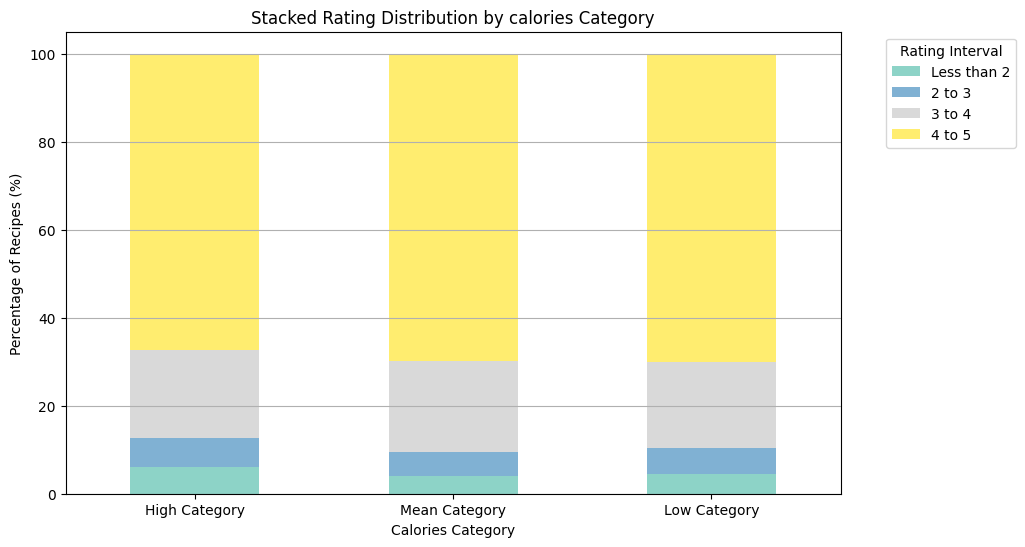


Comparison of Rating Distribution in %:
                 High Category  Mean Category  Low Category
rating_category                                            
Less than 2           6.140089       3.967107      4.536489
2 to 3                6.438152       5.451488      5.762463
3 to 4               20.000000      20.702520     19.661987
4 to 5               67.421759      69.878885     70.039061


In [154]:
# calories
comparison_calories = rating_distribution(
    df=merged_df,
    variable='calories',
    rating_var='note_moyenne',
    low_threshold=100,
    mean_range=(250, 350),
    high_threshold=1000
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_calories)

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/110

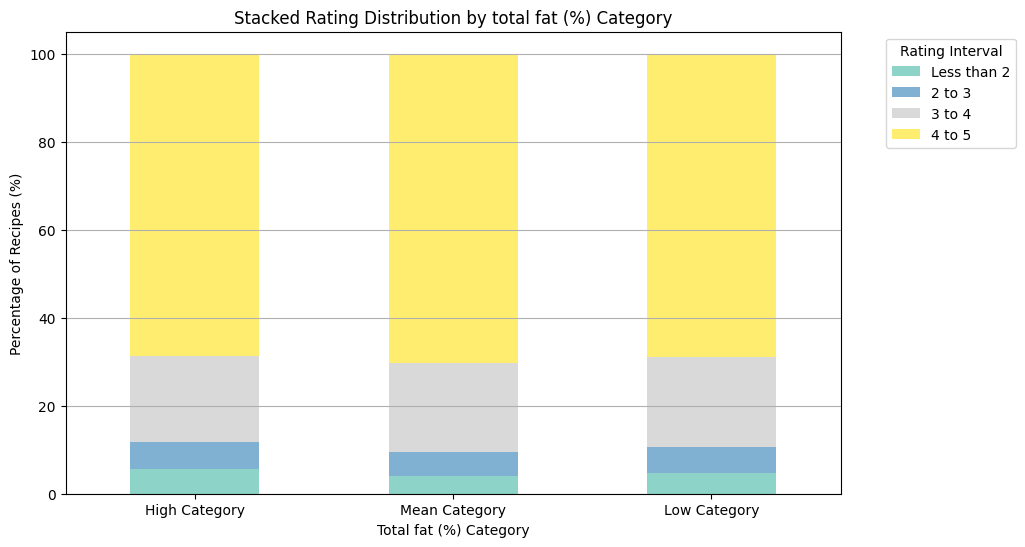


Comparison of Rating Distribution in %:
                 High Category  Mean Category  Low Category
rating_category                                            
Less than 2           5.519362       3.929237      4.776557
2 to 3                6.214772       5.452726      5.913919
3 to 4               19.588610      20.376097     20.434066
4 to 5               68.677256      70.241939     68.875458


In [155]:
comparison_fat = rating_distribution(
    df=merged_df,
    variable='total fat (%)',
    rating_var='note_moyenne',
    low_threshold=8,
    mean_range=(15, 25),
    high_threshold=100
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_fat)

In [156]:
merged_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'calories', 'total fat (%)', 'sugar (%)', 'sodium (%)',
       'protein (%)', 'saturated fat (%)', 'carbohydrates (%)', 'year',
       'month', 'day', 'day_of_week', 'recipe_id', 'nb_user', 'note_moyenne',
       'note_mediane', 'note_q1', 'note_q2', 'note_q3', 'note_q4', 'note_max',
       'note_min', 'nb_note_lt_5', 'nb_note_eq_5', 'prep_time_category'],
      dtype='object')

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/110

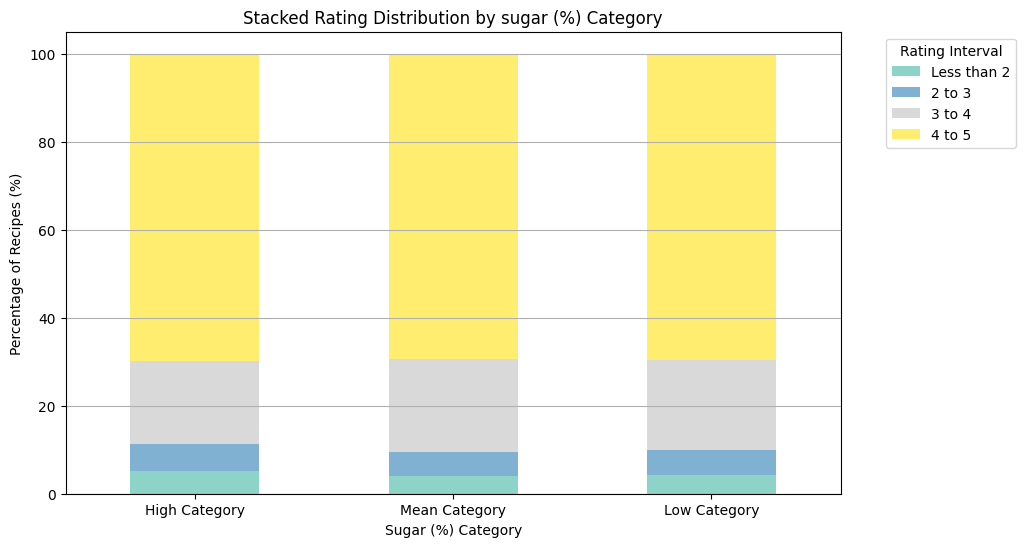


Comparison of Rating Distribution in %:
                 High Category  Mean Category  Low Category
rating_category                                            
Less than 2           5.228889       4.126973      4.335771
2 to 3                6.104377       5.350810      5.553730
3 to 4               18.775919      21.097281     20.491702
4 to 5               69.890814      69.424936     69.618797


In [157]:
comparison_sugar = rating_distribution(
    df=merged_df,
    variable='sugar (%)',
    rating_var='note_moyenne',
    low_threshold=8,
    mean_range=(20, 30),
    high_threshold=80
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_sugar)

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/110

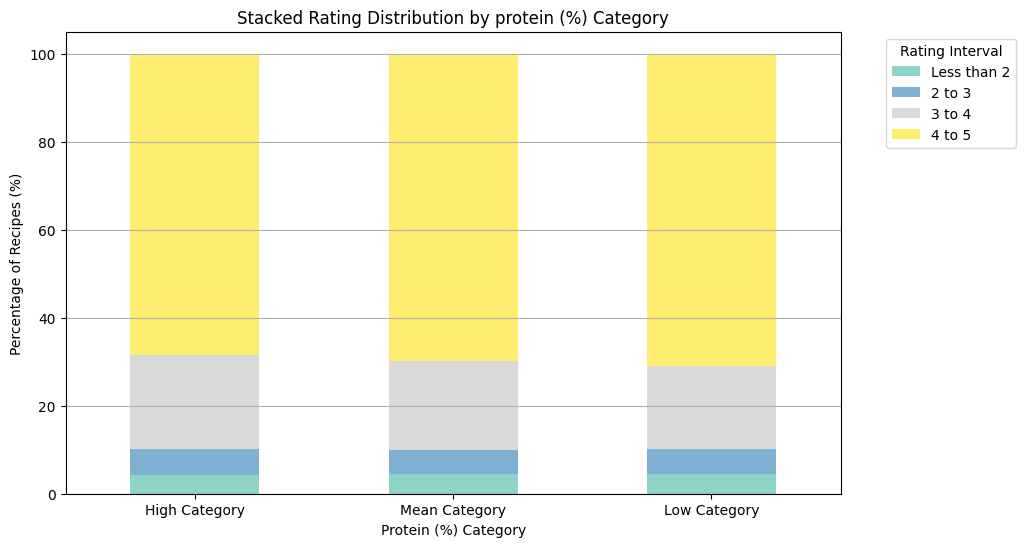


Comparison of Rating Distribution in %:
                 High Category  Mean Category  Low Category
rating_category                                            
Less than 2           5.228889       4.126973      4.335771
2 to 3                6.104377       5.350810      5.553730
3 to 4               18.775919      21.097281     20.491702
4 to 5               69.890814      69.424936     69.618797


In [158]:
comparison_prot = rating_distribution(
    df=merged_df,
    variable='protein (%)',
    rating_var='note_moyenne',
    low_threshold=8,
    mean_range=(15, 25),
    high_threshold=60
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_sugar)




Recipes high on calories and fat seem to be correlated with lower ratings.

# Analyser l'impact de la popularité and visibilité des recettes sur les notes

In [159]:
# Calculate Q1, Q3, and IQR for 'minutes'
Q1_nb_user = merged_df['nb_user'].quantile(0.25)
Q2_nb_user = merged_df['nb_user'].quantile(0.50)
Q3_nb_user = merged_df['nb_user'].quantile(0.75)

print(Q1_nb_user)
print(Q2_nb_user)
print(Q3_nb_user)

1.0
2.0
4.0


/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/1101855445.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['rating_category'] = pd.cut(subset[rating_var], bins=bins, labels=labels, right=True)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/110

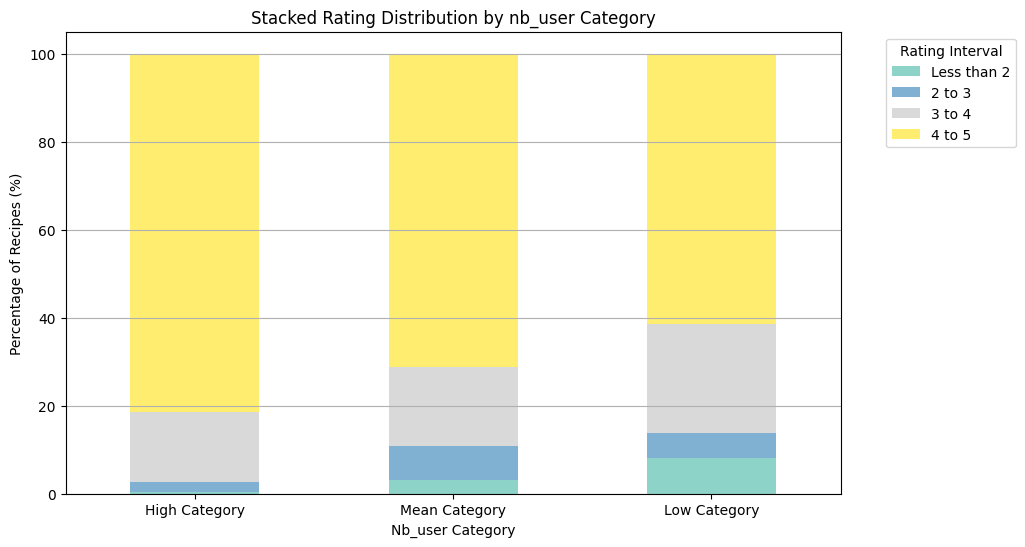


Comparison of Rating Distribution in %:
                 High Category  Mean Category  Low Category
rating_category                                            
Less than 2           0.417981       2.999257      8.005264
2 to 3                2.158945       7.710715      5.745389
3 to 4               15.959769      18.016448     24.866235
4 to 5               81.463305      71.273581     61.383113


In [160]:
comparison_popularity = rating_distribution(
    df=merged_df,
    variable='nb_user',
    rating_var='note_moyenne',
    low_threshold=2,
    mean_range=(2, 4),
    high_threshold=4
)

# Display the comparison
print("\nComparison of Rating Distribution in %:")
print(comparison_popularity)

Il est très net ici que les recettes ayant le moins de notes sont celles les moins bien notés. Cela veut dire qu'elles sont moins populaires et/ou moins visibles. Au contraire celles avec le plus de notes sont les mieux notées. 

A CREUSER :
- qui sont les users qui ont mal noté ces recettes : ont-ils beaucoup noté ? Mettent-ils que des mauvaises notes ? Pour vérifier si cette info est significative
Ou ça peut vouloir dire que les utilisateurs ne notent pas les mauvaises recettes. La mauvaise note appelle la mauvaise note. 
- faire un heatmap : nb_users/note_moyenne

# Analyses des variables categorical - tags & descriptions - pour comprendre grâce au verbage les critères d'une mauvaise note

Analysons les tags et descriptions pour essayer de trouver des thèmes communs entre les recettes mal notées. Pour cela nous utiliserons le dataframe bad_ratings. La première étape est de réaliser un pre-processing de ces variables (enlever les mots inutiles, tokeniser).

In [161]:
def preprocess_text(text):
    # Convertir en minuscule
    text = text.lower()
    # Retirer la punctuation et les caractères speciaux
    text = re.sub(r'[^\w\s]', '', text)
    # Retirer les chiffres
    text = re.sub(r'\d+', '', text)
    # Enlever les "stop words" (d'après liste fournie par sklearn)
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

In [162]:
# Appliquer la fonction aux variables tags et description 
bad_ratings['tags_clean'] = bad_ratings['tags'].fillna('').apply(preprocess_text)
bad_ratings['description_clean'] = bad_ratings['description'].fillna('').apply(preprocess_text)

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/2918248300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_ratings['tags_clean'] = bad_ratings['tags'].fillna('').apply(preprocess_text)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gp/T/ipykernel_69951/2918248300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_ratings['description_clean'] = bad_ratings['description'].fillna('').apply(preprocess_text)


In [163]:
bad_ratings.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'calories', 'total fat (%)', 'sugar (%)', 'sodium (%)',
       'protein (%)', 'saturated fat (%)', 'carbohydrates (%)', 'year',
       'month', 'day', 'day_of_week', 'recipe_id', 'nb_user', 'note_moyenne',
       'note_mediane', 'note_q1', 'note_q2', 'note_q3', 'note_q4', 'note_max',
       'note_min', 'nb_note_lt_5', 'nb_note_eq_5', 'tags_clean',
       'description_clean'],
      dtype='object')

Maintenant que les colonnes sont pre-procéssées, tentons de dégager des tendances en regardant les distributions :

In [164]:
# Combiner les tags and descriptions pour les recettes mal notées
all_tags_text = ' '.join(bad_ratings['tags_clean'].dropna())
all_description_text = ' '.join(bad_ratings['description_clean'].dropna())

# Get most common words in tags and descriptions for bad-rated recipes
tag_words = all_tags_text.split()
desc_words = all_description_text.split()

tag_word_counts = Counter(tag_words).most_common(20)
desc_word_counts = Counter(desc_words).most_common(20)

# Display the most common words
print("Most common words in tags for bad-rated recipes:")
print(tag_word_counts)

print("\nMost common words in descriptions for bad-rated recipes:")
print(desc_word_counts)

Most common words in tags for bad-rated recipes:
[('preparation', 36743), ('timetomake', 35687), ('course', 34717), ('dietary', 26953), ('mainingredient', 26203), ('minutesorless', 25754), ('easy', 19547), ('occasion', 18221), ('cuisine', 14652), ('lowinsomething', 13907), ('equipment', 11728), ('maindish', 11532), ('healthy', 11200), ('numberofservings', 9769), ('meat', 8633), ('desserts', 8603), ('hoursorless', 8533), ('tastemood', 8421), ('northamerican', 7934), ('vegetables', 7519)]

Most common words in descriptions for bad-rated recipes:
[('recipe', 20273), ('make', 8131), ('time', 6134), ('use', 5540), ('like', 5429), ('great', 5320), ('easy', 5147), ('good', 4798), ('just', 4252), ('dish', 3710), ('delicious', 3551), ('chicken', 2930), ('love', 2883), ('sauce', 2865), ('used', 2527), ('recipes', 2504), ('really', 2480), ('cooking', 2468), ('dont', 2429), ('cake', 2389)]


La moyenne a pu modifier les corrélations entre variables. Nous allons inverser notre dataset pour vérifier cette hypothèse : partir du dataset user et y join les informations liées aux recettes, puis calculer les coefficients de corrélation de chaque méthode. De cette manière les variations et préférences individuelles seront analysables. 

# Changement de dataframe

In [165]:
recipe = pd.read_csv("/Users/macbook/Documents/data_science_master/kit_big_data/projet/data/recipe_cleaned.csv")
users = pd.read_csv("/Users/macbook/Documents/data_science_master/kit_big_data/projet/data/RAW_interactions.csv")
users.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [166]:
recipe.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),year,month,day,day_of_week
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,13.0,0.0,2.0,0.0,4.0,2005,9,16,Friday
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,18.0,0.0,17.0,22.0,35.0,1.0,2002,6,17,Monday
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,22.0,32.0,48.0,39.0,27.0,5.0,2005,2,25,Friday
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,17.0,10.0,2.0,14.0,8.0,20.0,2003,4,14,Monday
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,...,1.0,337.0,23.0,3.0,0.0,28.0,2002,10,25,Friday


In [167]:
user_analysis = pd.merge(users, recipe, left_on="recipe_id", right_on="id", how="left")
user_analysis.head()

,user_id,recipe_id,date,rating,review,name,id,minutes,contributor_id,submitted,...,total fat (%),sugar (%),sodium (%),protein (%),saturated fat (%),carbohydrates (%),year,month,day,day_of_week
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,40893.0,495.0,1533.0,2002-09-21,...,5.0,9.0,26.0,24.0,2.0,10.0,2002.0,9.0,21.0,Saturday
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,40893.0,495.0,1533.0,2002-09-21,...,5.0,9.0,26.0,24.0,2.0,10.0,2002.0,9.0,21.0,Saturday
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,44394.0,20.0,56824.0,2002-10-27,...,11.0,39.0,5.0,4.0,11.0,5.0,2002.0,10.0,27.0,Sunday
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,85009.0,10.0,64342.0,2004-02-25,...,342.0,134.0,290.0,161.0,301.0,42.0,2004.0,2.0,25.0,Wednesday
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,85009.0,10.0,64342.0,2004-02-25,...,342.0,134.0,290.0,161.0,301.0,42.0,2004.0,2.0,25.0,Wednesday


In [168]:
print('Le nombre de missing values par colonnes :')
print(user_analysis.isna().sum())

Le nombre de missing values par colonnes :
user_id                0
recipe_id              0
date                   0
rating                 0
review               169
name                  34
id                    34
minutes               34
contributor_id        34
submitted             34
tags                  34
nutrition             34
n_steps               34
steps                 34
description           34
ingredients           34
n_ingredients         34
calories              34
total fat (%)         34
sugar (%)             34
sodium (%)            34
protein (%)           34
saturated fat (%)     34
carbohydrates (%)     34
year                  34
month                 34
day                   34
day_of_week           34
dtype: int64


34 notes ne correspondent à aucune recette. Ce sont les outliers qu'on a sorti du dataset recipe. Nous allons les drop. Nous allons ensuite remplasser les review manquantes par "missing".

In [169]:
user_analysis = user_analysis.dropna(subset=['name'])

In [170]:
user_analysis['review'] = user_analysis['review'].fillna("missing")


In [171]:
print(user_analysis.isna().sum())

user_id              0
recipe_id            0
date                 0
rating               0
review               0
name                 0
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description          0
ingredients          0
n_ingredients        0
calories             0
total fat (%)        0
sugar (%)            0
sodium (%)           0
protein (%)          0
saturated fat (%)    0
carbohydrates (%)    0
year                 0
month                0
day                  0
day_of_week          0
dtype: int64


In [172]:
# Nous ne gardons que les colonnes utiles à l'analyse et non rébérbative
user_analysis.drop(['name', 'id','nutrition','steps', 'saturated fat (%)'], axis=1, inplace=True)

In [173]:
# List of ID columns to convert
id_columns = ['recipe_id', 'user_id', 'contributor_id','year', 'month', 'day']  # Replace with your actual ID column names

# Convert each ID column to a categorical type
for col in id_columns:
    user_analysis[col] = user_analysis[col].astype('category')

# Verify the changes
print(user_analysis[id_columns].dtypes)

recipe_id         category
user_id           category
contributor_id    category
year              category
month             category
day               category
dtype: object


In [174]:
user_analysis.head()

,user_id,recipe_id,date,rating,review,minutes,contributor_id,submitted,tags,n_steps,...,calories,total fat (%),sugar (%),sodium (%),protein (%),carbohydrates (%),year,month,day,day_of_week
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,495.0,1533.0,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",4.0,...,204.8,5.0,9.0,26.0,24.0,10.0,2002.0,9.0,21.0,Saturday
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",495.0,1533.0,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",4.0,...,204.8,5.0,9.0,26.0,24.0,10.0,2002.0,9.0,21.0,Saturday
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,20.0,56824.0,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...",5.0,...,132.3,11.0,39.0,5.0,4.0,5.0,2002.0,10.0,27.0,Sunday
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,10.0,64342.0,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",3.0,...,2786.2,342.0,134.0,290.0,161.0,42.0,2004.0,2.0,25.0,Wednesday
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",10.0,64342.0,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",3.0,...,2786.2,342.0,134.0,290.0,161.0,42.0,2004.0,2.0,25.0,Wednesday


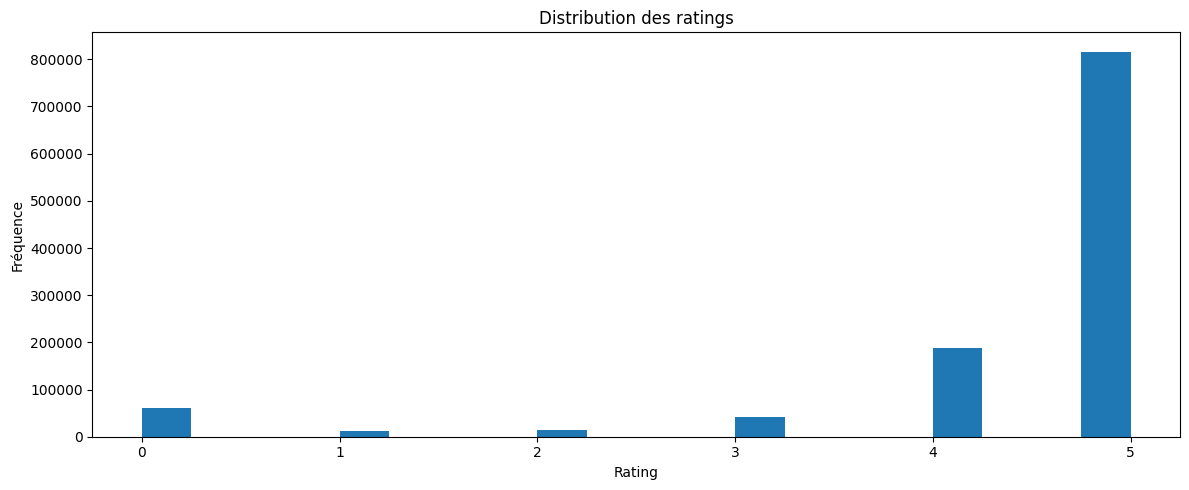

In [175]:
# Plot histograms for mean and median
plt.figure(figsize=(12, 5))
plt.hist(user_analysis['rating'], bins=20)
plt.title('Distribution des ratings')
plt.xlabel('Rating')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

In [176]:
# Filtrer les mauvaises notes
low_ratings = user_analysis[user_analysis['rating'] < 4.0]

# Display the number of recipes with this rating
print("Number of recipes with a mean of less than 4.0:", low_ratings.shape[0])

Number of recipes with a mean of less than 4.0: 128639


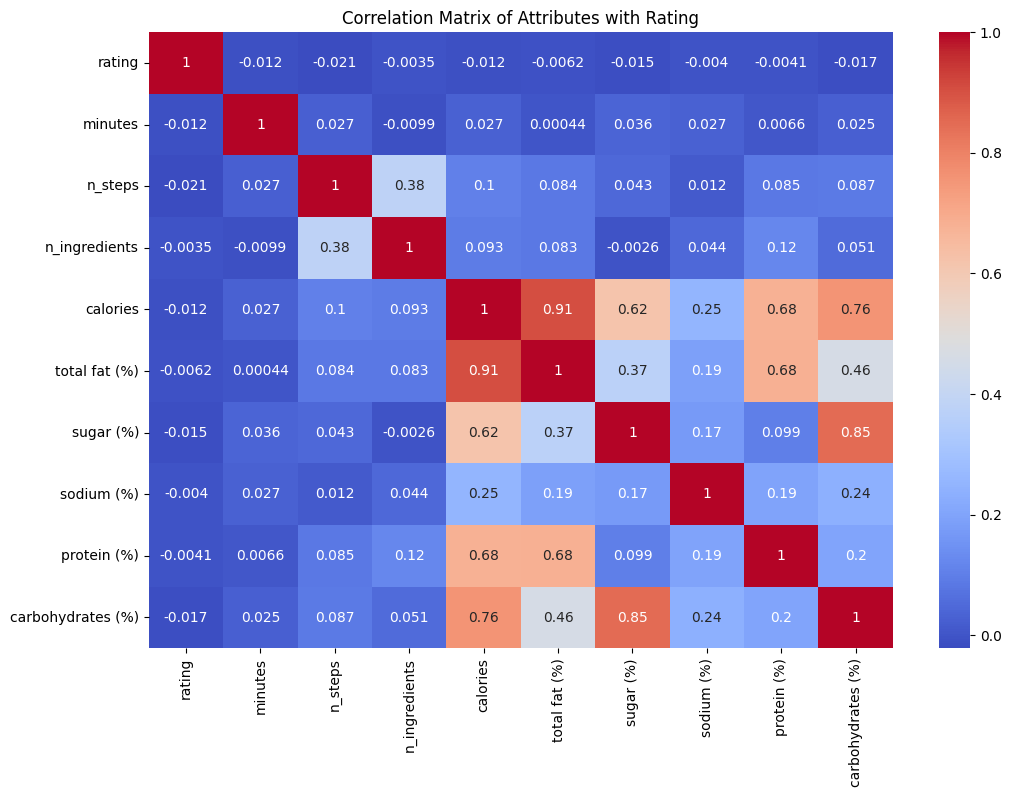

In [177]:
# Vérifions les corrélations entre les variables de ce nouveay dataframe

plt.figure(figsize=(12, 8))
correlation = user_analysis[['rating','minutes', 'n_steps', 'n_ingredients', 'calories', 'total fat (%)', 'sugar (%)', 
                           'sodium (%)', 'protein (%)', 'carbohydrates (%)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Attributes with Rating')
plt.show()

Comme aucune corrélation visible n'apparait, nous allons faire du feature engineering

# Feature Engineering sur le dataset user_analysis 

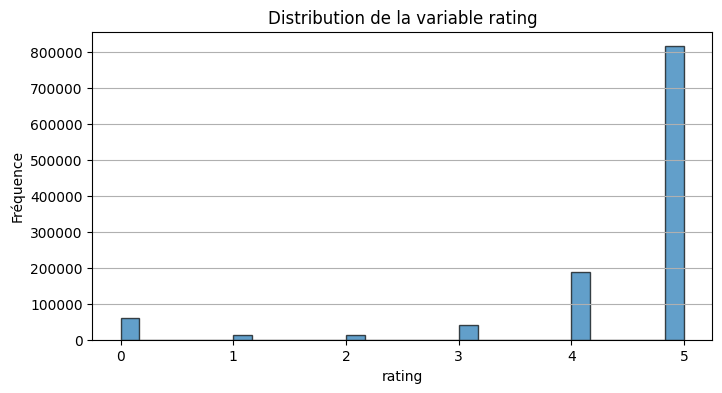

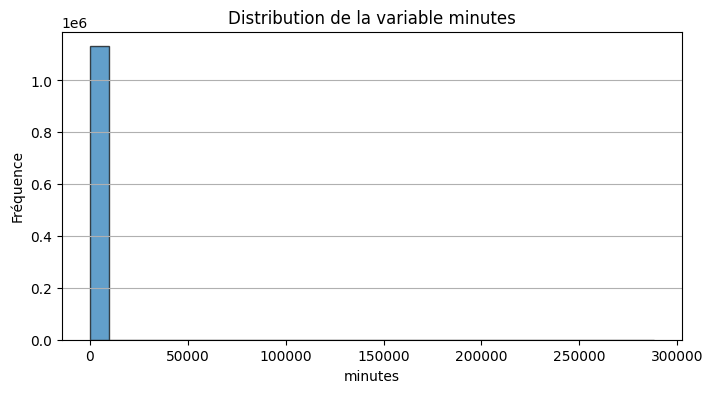

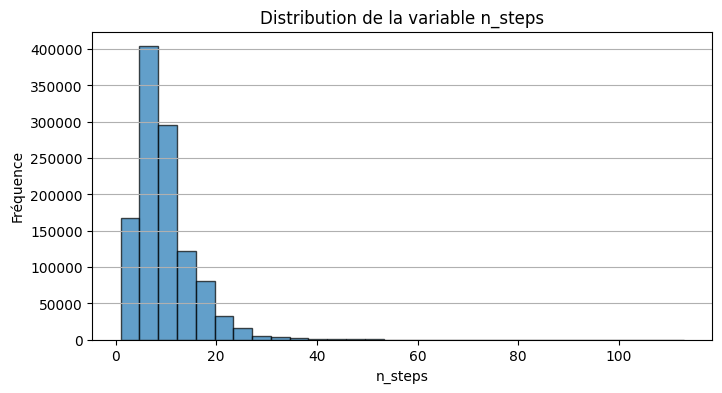

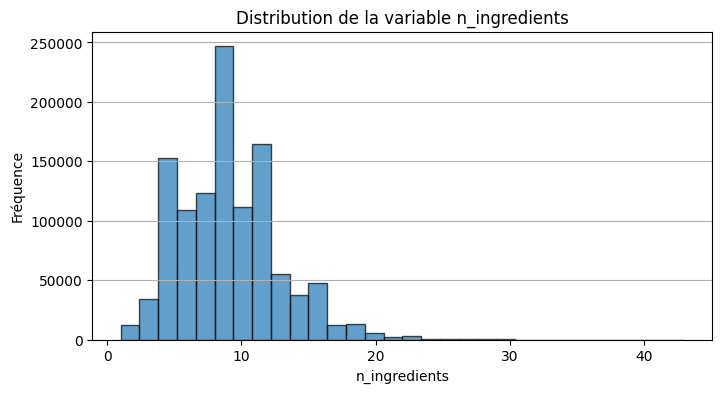

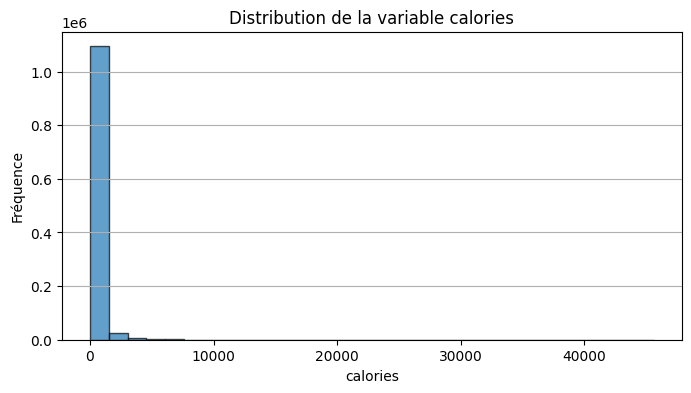

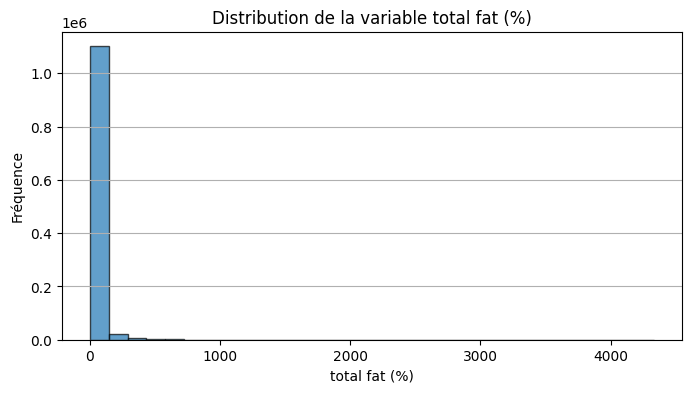

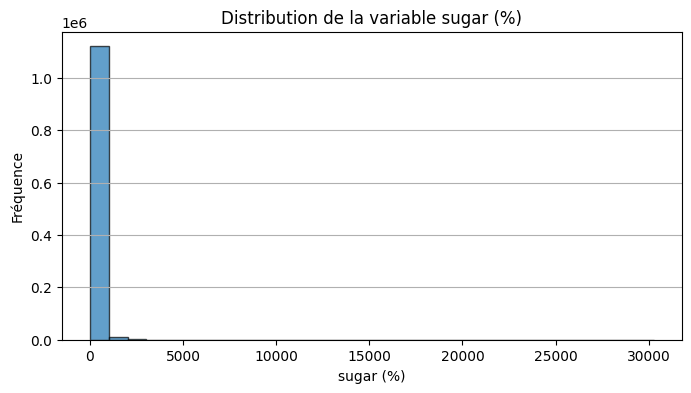

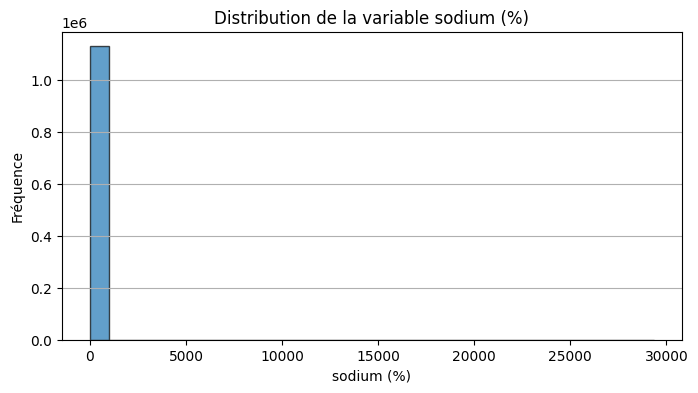

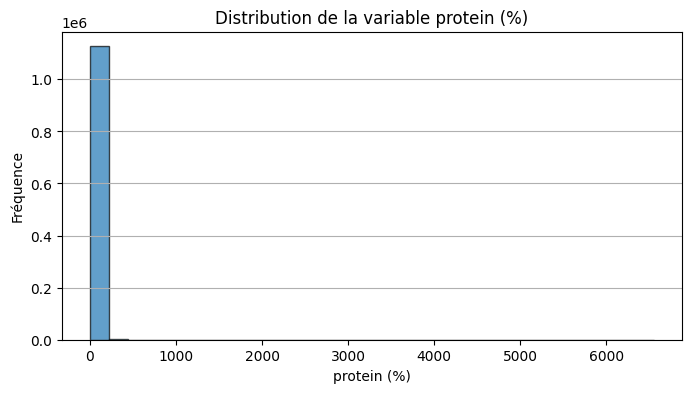

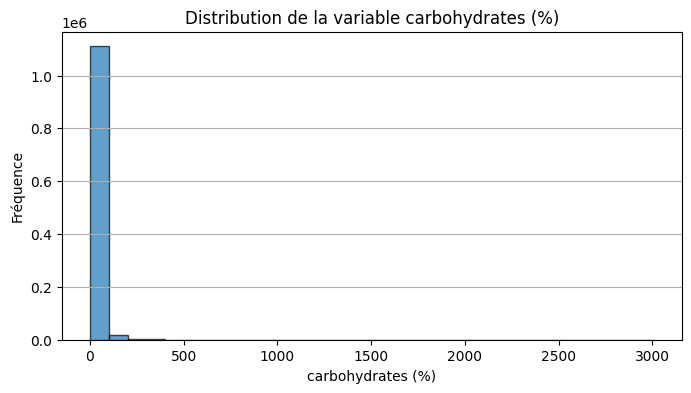

In [178]:
# Vérifions la distribution des variables numériques pour voir quelles variables passer au log :
for column in user_analysis.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    plt.hist(user_analysis[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution de la variable {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.grid(axis='y')
    plt.show()

In [179]:
user_analysis.describe()

,rating,minutes,n_steps,n_ingredients,calories,total fat (%),sugar (%),sodium (%),protein (%),carbohydrates (%)
count,1.132333e+06,1.132333e+06,1.132333e+06,1.132333e+06,1.132333e+06,1.132333e+06,1.132333e+06,1.132333e+06,1.132333e+06,1.132333e+06
mean,4.411018e+00,1.123599e+02,9.627178e+00,8.952070e+00,4.589315e+02,3.462439e+01,7.764163e+01,3.196321e+01,3.574920e+01,1.483152e+01
std,1.264740e+00,1.472983e+03,5.810010e+00,3.689940e+00,7.435371e+02,7.143056e+01,2.348528e+02,1.205477e+02,7.421102e+01,2.944906e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,2.000000e+01,6.000000e+00,6.000000e+00,1.764000e+02,9.000000e+00,9.000000e+00,6.000000e+00,7.000000e+00,4.000000e+00
50%,5.000000e+00,4.000000e+01,8.000000e+00,9.000000e+00,3.127000e+02,2.000000e+01,2.400000e+01,1.600000e+01,1.800000e+01,9.000000e+00
75%,5.000000e+00,7.000000e+01,1.200000e+01,1.100000e+01,5.127000e+02,4.000000e+01,6.700000e+01,3.500000e+01,5.300000e+01,1.600000e+01
max,5.000000e+00,2.880000e+05,1.130000e+02,4.300000e+01,4.560900e+04,4.331000e+03,3.026000e+04,2.933800e+04,6.552000e+03,3.007000e+03


In [180]:
# Catégoriser la complexité
user_analysis['complexity_score'] = user_analysis['n_steps'] * user_analysis['n_ingredients']

In [181]:
user_analysis['complexity_level'] = pd.cut(user_analysis['complexity_score'], bins=[0, 40, 72, 120, float('inf')], labels=['simple', 'moderate', 'complex', 'very complex'])

In [182]:
user_analysis['preparation_time'] = pd.cut(user_analysis['minutes'], bins=[0, 20, 40, 70, float('inf')], labels=['quick', 'medium', 'long', 'very long'])

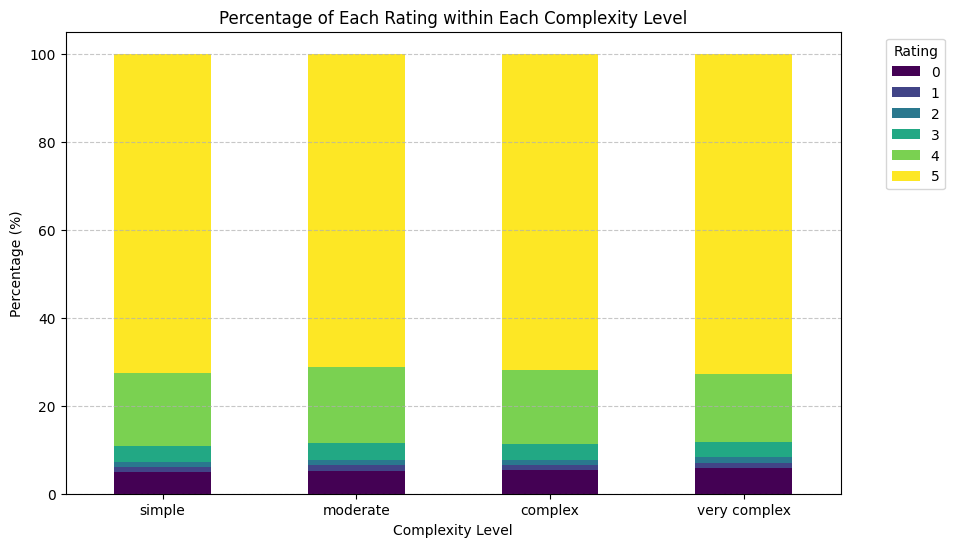

In [183]:
# Vérifions avec un stacked bar chart la proportion de ratings dans chaque catégorie ainsi créée

# Create a crosstab for counts of each rating per complexity level
rating_counts = pd.crosstab(user_analysis['complexity_level'], user_analysis['rating'], normalize='index') * 100

# Plot a stacked bar chart
rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Percentage of Each Rating within Each Complexity Level')
plt.xlabel('Complexity Level')
plt.ylabel('Percentage (%)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

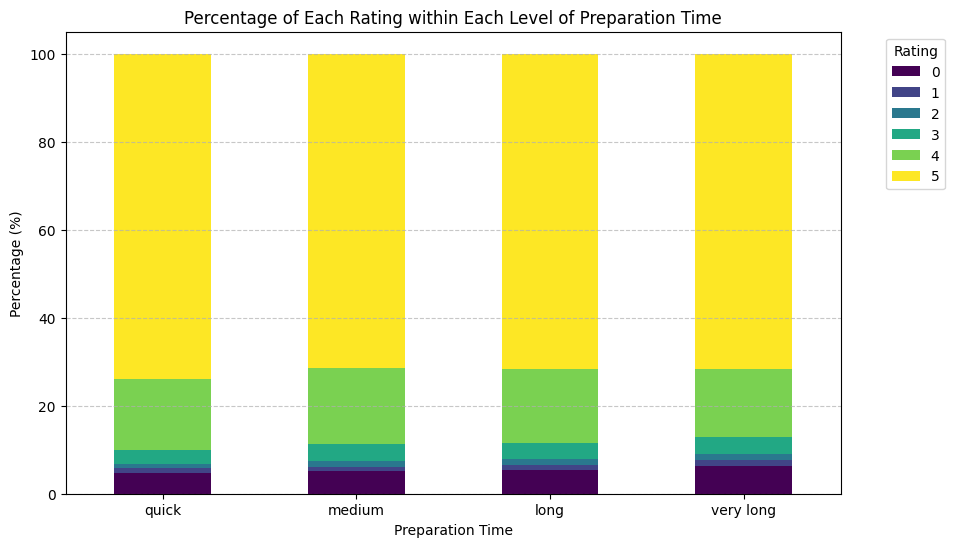

In [184]:
rating_counts_time = pd.crosstab(user_analysis['preparation_time'], user_analysis['rating'], normalize='index') * 100

# Plot a stacked bar chart
rating_counts_time.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Percentage of Each Rating within Each Level of Preparation Time')
plt.xlabel('Preparation Time')
plt.ylabel('Percentage (%)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [185]:
user_analysis.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review', 'minutes',
       'contributor_id', 'submitted', 'tags', 'n_steps', 'description',
       'ingredients', 'n_ingredients', 'calories', 'total fat (%)',
       'sugar (%)', 'sodium (%)', 'protein (%)', 'carbohydrates (%)', 'year',
       'month', 'day', 'day_of_week', 'complexity_score', 'complexity_level',
       'preparation_time'],
      dtype='object')

In [186]:
# Transformation par le log des variables avec forte skewness :
user_analysis['log_complexity_score'] = np.log1p(user_analysis['complexity_score'])
user_analysis['log_minutes'] = np.log1p(user_analysis['minutes'])
user_analysis['log_n_steps'] = np.log1p(user_analysis['n_steps'])
user_analysis['log_calories'] = np.log1p(user_analysis['calories'])
user_analysis['log_fat'] = np.log1p(user_analysis['total fat (%)'])
user_analysis['log_sugar'] = np.log1p(user_analysis['sugar (%)'])
user_analysis['log_sodium'] = np.log1p(user_analysis['sodium (%)'])
user_analysis['log_protein'] = np.log1p(user_analysis['protein (%)'])
user_analysis['log_carbo'] = np.log1p(user_analysis['carbohydrates (%)'])

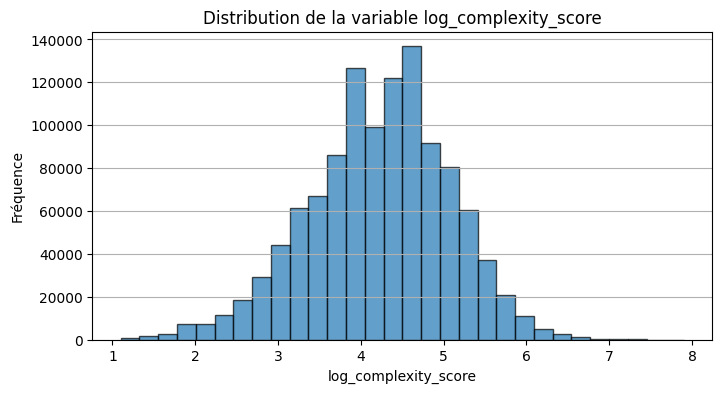

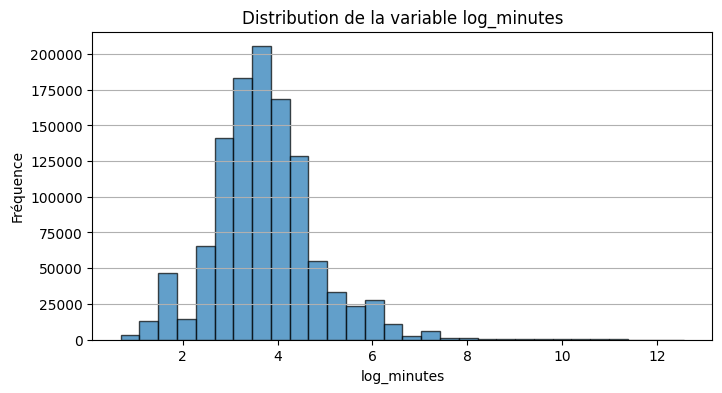

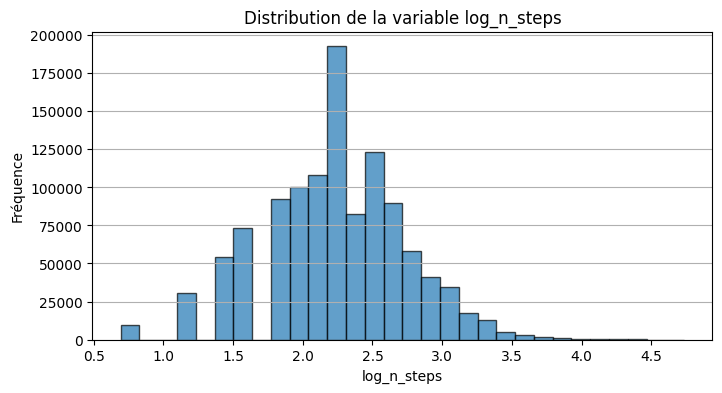

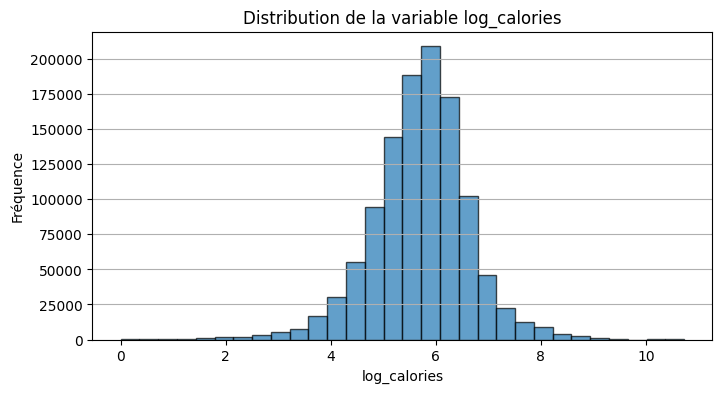

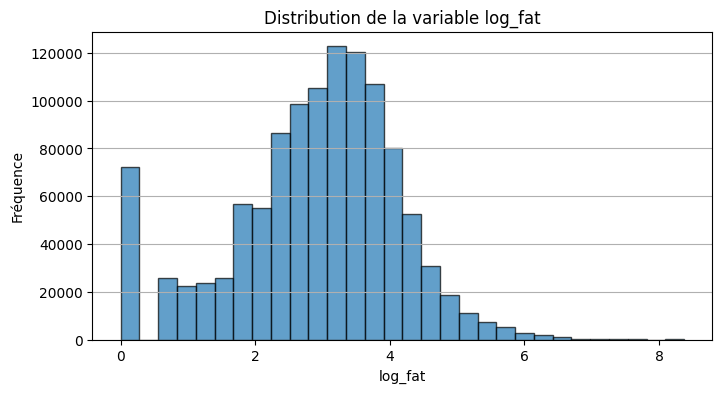

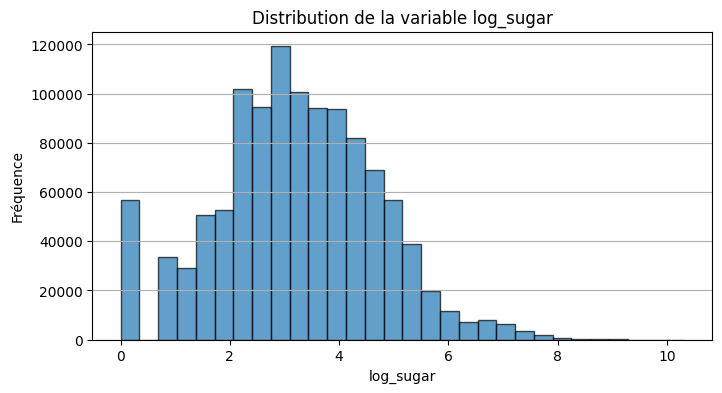

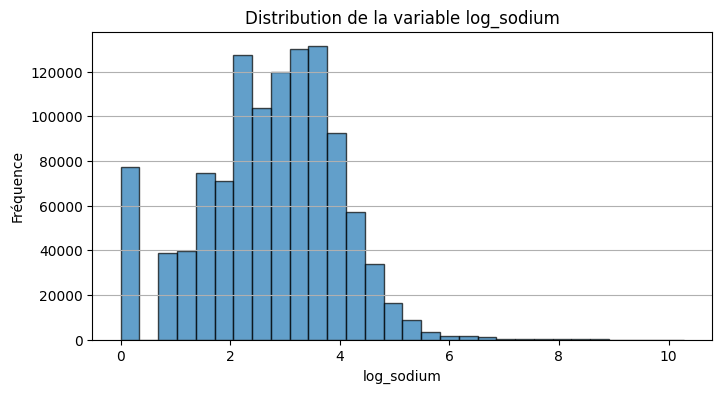

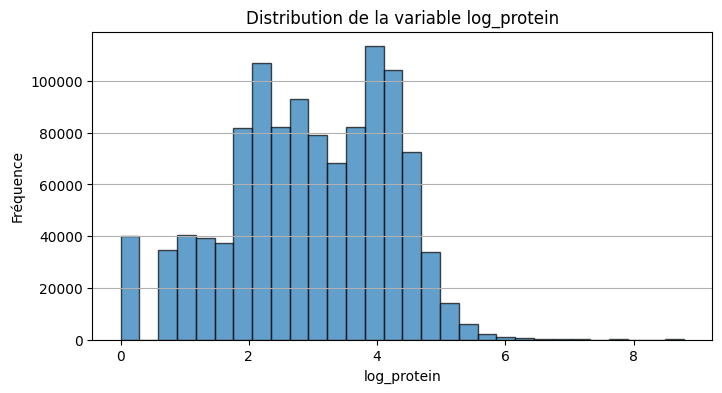

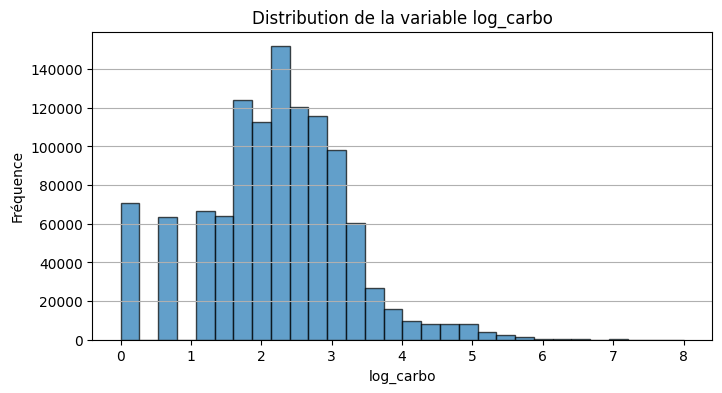

In [187]:
# Distribution des log
list_log = ['log_complexity_score','log_minutes','log_n_steps', 'log_calories','log_fat','log_sugar','log_sodium','log_protein','log_carbo']
for column in list_log:
    plt.figure(figsize=(8, 4))
    plt.hist(user_analysis[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution de la variable {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.grid(axis='y')
    plt.show()

Nos variables sont maintenant gaussiennes. Analysons les corrélations et évaluons le modèle linéaire avec ces variables log :

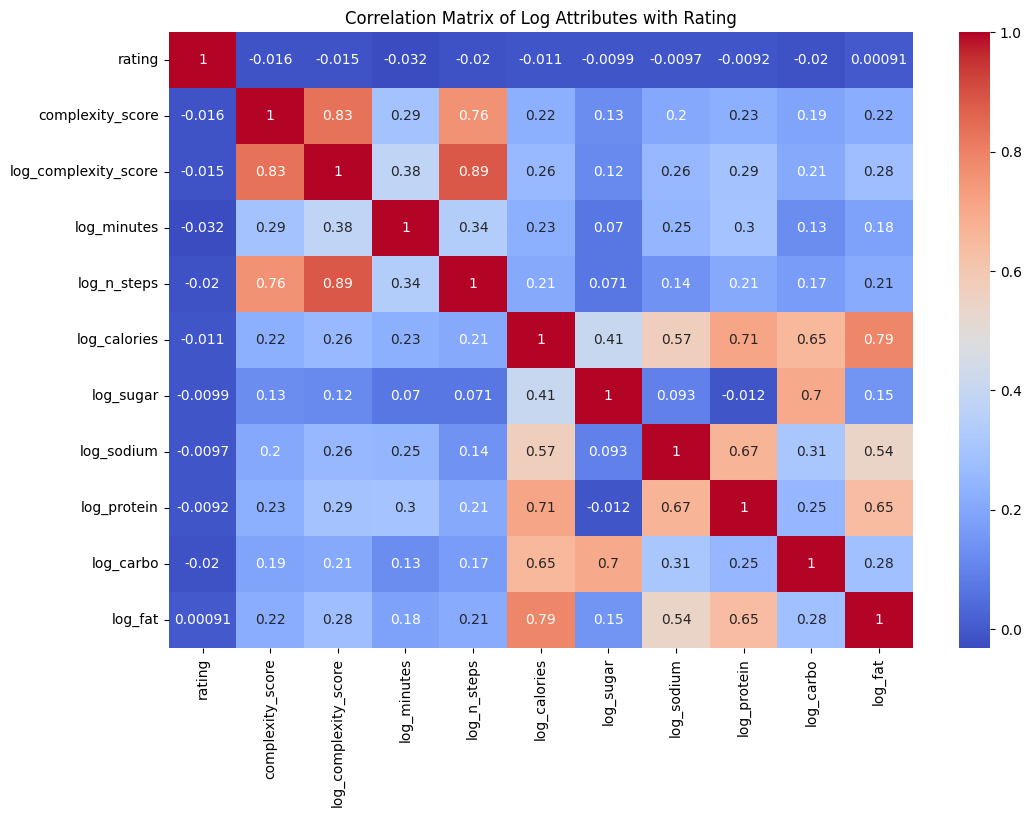

In [188]:
# Vérifions à nouveau les corrélations à partir des logarithmes

plt.figure(figsize=(12, 8))
correlation_log = user_analysis[['rating','complexity_score', 'log_complexity_score', 'log_minutes', 'log_n_steps', 'log_calories', 'log_sugar', 
                           'log_sodium', 'log_protein', 'log_carbo','log_fat']].corr()
sns.heatmap(correlation_log, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Log Attributes with Rating')
plt.show()

In [189]:
# Regression analysis for log variables

# Prepare data
X = user_analysis[['log_complexity_score', 'log_minutes', 'log_n_steps', 'log_calories', 'log_sugar', 
                           'log_sodium', 'log_protein', 'log_carbo','log_fat']]
X = sm.add_constant(X)
y = np.log1p(user_analysis['rating'])

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:54:50   Log-Likelihood:            -6.2625e+05
No. Observations:             1132333   AIC:                         1.253e+06
Df Residuals:                 1132323   BIC:                         1.253e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.7015 

Malgré la transformation des variables par le log qui nous a permis d'avoir des variables gaussienne, nous remarquons qu'il n'existe pas de relations linéaires entre les variables. Un modèle de corrélation et regression classique ne fonctionne donc pas pour comprendre quelles variables impactent les ratings.

Analysons les recettes comportant des ingrédients rares afin de voir si cela influe sur les ratings.

In [190]:
# Calculer la fréquence des ingrédients dans les recettes
# Drop les doublons de recette

unique_recipes = user_analysis.drop_duplicates(subset='recipe_id')

import ast

l_ingredient = list(unique_recipes.ingredients)
list_ingredient = []
for item in l_ingredient: 
    item = ast.literal_eval(item)
    for i in item: 
        list_ingredient.append(i)

element_counts = Counter(list_ingredient)

In [191]:
# Définissons un sueil de rareté et stockons les ingrédients rares dans un set (plus rapide qu'une liste)
rare_ingredients = set([ingredient for ingredient, count in element_counts.items() if count == 1])

# Parse ingredients once and check for any rare ingredient
def has_rare_ingredient(ingredient_str):
    # Convert the string representation of the list to an actual list of ingredients
    ingredients = ast.literal_eval(ingredient_str)
    # Check if any ingredient in the recipe is in the set of rare ingredients
    return any(ingredient in rare_ingredients for ingredient in ingredients)

# Ajouter une colonne qui flag si la recette comporte des ingrédients rares
user_analysis['has_unique_ingredient'] = user_analysis['ingredients'].apply(has_rare_ingredient)

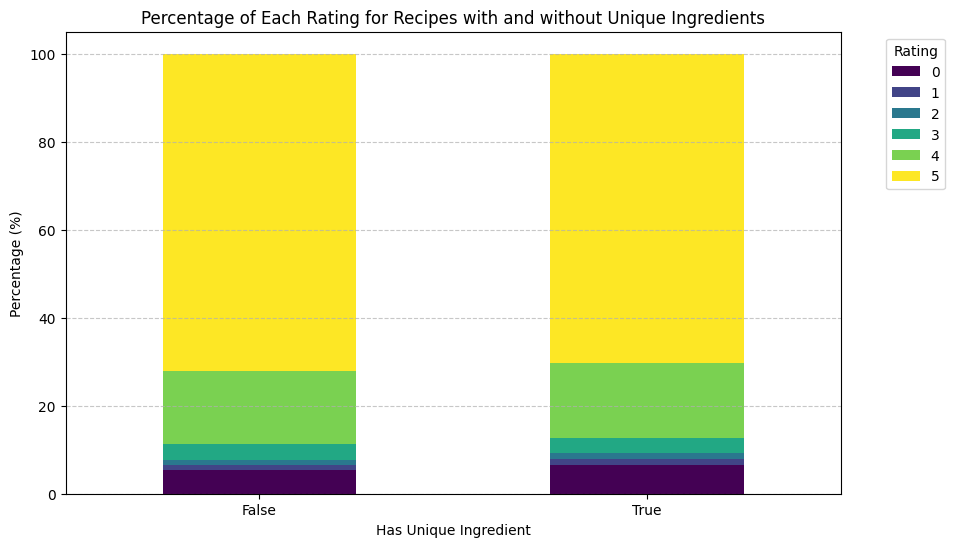

In [192]:
# Visualisons si la variable "unique ingredient" impacte les ratings
unique_ingr_percentage = user_analysis.groupby('has_unique_ingredient')['rating'].value_counts(normalize=True) * 100
unique_ingr_percentage = unique_ingr_percentage.rename('percentage').reset_index()

unique_ingr_percentage_pivot = unique_ingr_percentage.pivot(index='has_unique_ingredient', columns='rating', values='percentage')

# Plot the stacked bar chart
unique_ingr_percentage_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Percentage of Each Rating for Recipes with and without Unique Ingredients')
plt.xlabel('Has Unique Ingredient')
plt.ylabel('Percentage (%)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Longueur des Reviews et Descriptions : Calculate the character count of each review and of each description.

In [193]:
user_analysis['review_length'] = user_analysis['review'].apply(lambda x: len(x) if pd.notnull(x) else 0)
user_analysis['description_length'] = user_analysis['description'].apply(lambda x: len(x) if pd.notnull(x) else 0)

In [194]:
user_analysis['review_length'].describe()

count    1.132333e+06
mean     2.783677e+02
std      1.974094e+02
min      1.000000e+00
25%      1.470000e+02
50%      2.370000e+02
75%      3.580000e+02
max      8.587000e+03
Name: review_length, dtype: float64

In [195]:
user_analysis['description_length'].describe()

count    1.132333e+06
mean     2.269571e+02
std      2.126101e+02
min      1.000000e+00
25%      9.300000e+01
50%      1.710000e+02
75%      2.890000e+02
max      6.321000e+03
Name: description_length, dtype: float64

In [196]:
user_analysis['review_quality'] = pd.cut(user_analysis['review_length'], bins=[0, 100, 200, 400, float('inf')], labels=['short', 'medium', 'long', 'very long'])
user_analysis['description_quality'] = pd.cut(user_analysis['description_length'], bins=[0, 80, 200, 400, float('inf')], labels=['short', 'medium', 'long', 'very long'])

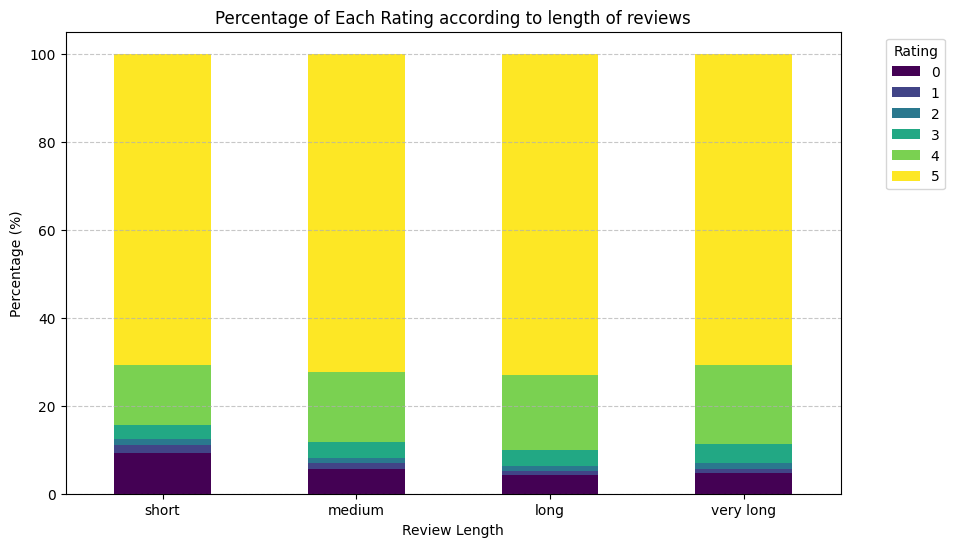

In [197]:
rating_review_length = pd.crosstab(user_analysis['review_quality'], user_analysis['rating'], normalize='index') * 100

# Plot a stacked bar chart
rating_review_length.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Percentage of Each Rating according to length of reviews')
plt.xlabel('Review Length')
plt.ylabel('Percentage (%)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Les utilisateurs qui ont mal noté ont également ajouté des reviews très courtes. Cela veut dire qu'une analyse textuelle basée sur les reviews ne nous apporterait pas beaucoup d'informations sur pourquoi les utilisateurs ont mal noté la recette.

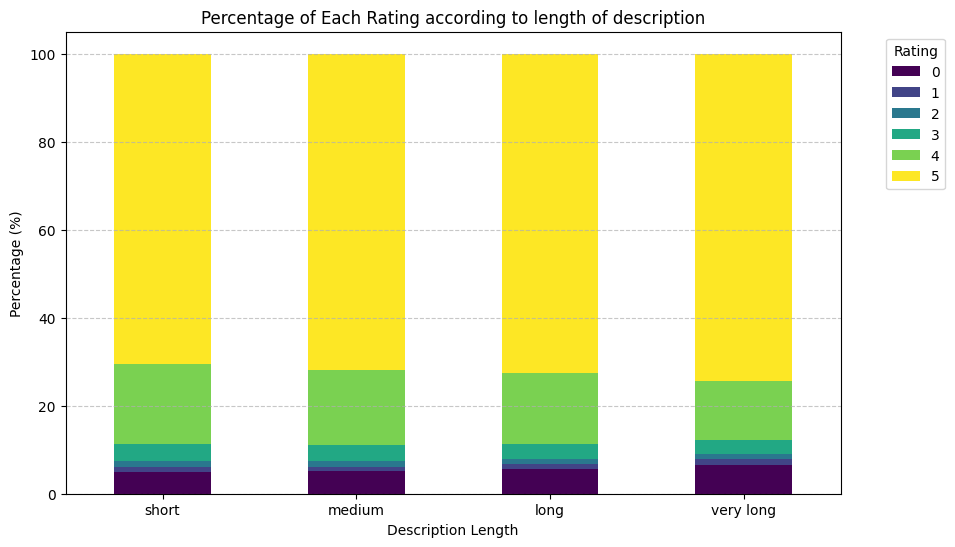

In [198]:
rating_description_length = pd.crosstab(user_analysis['description_quality'], user_analysis['rating'], normalize='index') * 100

# Plot a stacked bar chart
rating_description_length.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Percentage of Each Rating according to length of description')
plt.xlabel('Description Length')
plt.ylabel('Percentage (%)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Légère corrélation entre la longueur de la description de la recette et la note : une description très étayée aura plus de chances d'avoir des notes extrêmes : soit très bonnes, soit très mauvaises. La longueur de la description réduit les notes moyennes.

# Preparing a clean dataset for machine learning

Nous avons retourné le dataframe dans tous les sens :
- créer de nouvelles features
- analyser les variables par rapport aux ratings et par rapport aux moyennes et médiannes des ratings
- analyser la temporalité
- transformer les variables grâce aux logs pour que nos variables deviennent gaussiennes
Nous en trouvons pas de corrélations fortes. D'après l'analyse de régression linéaire, il parait que notre modèle n'est pas linéaire.

Les prochaines étapes de l'analyse :
1. Analyse textuelle sur les descriptions et les reviews
2. Analyse des tags pour comprendre s'ils ont un impact sur les notes
3. Réaliser du clustering et du machine learning sur des modèles non-linéaires

Nous allons préparer un dataset pour ces études.

In [199]:
user_analysis.head()

,user_id,recipe_id,date,rating,review,minutes,contributor_id,submitted,tags,n_steps,...,log_fat,log_sugar,log_sodium,log_protein,log_carbo,has_unique_ingredient,review_length,description_length,review_quality,description_quality
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,495.0,1533.0,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",4.0,...,1.791759,2.302585,3.295837,3.218876,2.397895,False,138,27,medium,short
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",495.0,1533.0,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",4.0,...,1.791759,2.302585,3.295837,3.218876,2.397895,False,205,27,long,short
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,20.0,56824.0,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...",5.0,...,2.484907,3.688879,1.791759,1.609438,1.791759,False,99,7,short,short
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,10.0,64342.0,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",3.0,...,5.837730,4.905275,5.673323,5.087596,3.761200,False,68,149,short,medium
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",10.0,64342.0,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",3.0,...,5.837730,4.905275,5.673323,5.087596,3.761200,False,73,149,short,medium


In [200]:
print(user_analysis.isna().sum())

user_id                  0
recipe_id                0
date                     0
rating                   0
review                   0
minutes                  0
contributor_id           0
submitted                0
tags                     0
n_steps                  0
description              0
ingredients              0
n_ingredients            0
calories                 0
total fat (%)            0
sugar (%)                0
sodium (%)               0
protein (%)              0
carbohydrates (%)        0
year                     0
month                    0
day                      0
day_of_week              0
complexity_score         0
complexity_level         0
preparation_time         0
log_complexity_score     0
log_minutes              0
log_n_steps              0
log_calories             0
log_fat                  0
log_sugar                0
log_sodium               0
log_protein              0
log_carbo                0
has_unique_ingredient    0
review_length            0
d

In [204]:
# Separate categorical and numerical variables
categorical_vars = user_analysis.select_dtypes(include=['category', 'object']).columns
numerical_vars = user_analysis.select_dtypes(include=['number']).columns
bool_vars = user_analysis.select_dtypes(include=['boolean']).columns

# Print the categorical and numerical variables
print("Categorical Variables:")
print(categorical_vars.tolist())

print("\nNumerical Variables:")
print(numerical_vars.tolist())

print("\nBoolean Variables:")
print(bool_vars.tolist())

Categorical Variables:
['user_id', 'recipe_id', 'date', 'review', 'contributor_id', 'submitted', 'tags', 'description', 'ingredients', 'year', 'month', 'day', 'day_of_week', 'complexity_level', 'preparation_time', 'review_quality', 'description_quality']

Numerical Variables:
['rating', 'minutes', 'n_steps', 'n_ingredients', 'calories', 'total fat (%)', 'sugar (%)', 'sodium (%)', 'protein (%)', 'carbohydrates (%)', 'complexity_score', 'log_complexity_score', 'log_minutes', 'log_n_steps', 'log_calories', 'log_fat', 'log_sugar', 'log_sodium', 'log_protein', 'log_carbo', 'review_length', 'description_length']

Boolean Variables:
['has_unique_ingredient']


In [208]:
# On va sortir ce nouveau dataframe to csv pour démarrer une analyse prédictive 

user_analysis.to_csv('/Users/macbook/Documents/data_science_master/kit_big_data/projet/data/user_ratings_analysis.csv', index=False)